# Using `gwent` to Generate Characteristic Strain Curves

Here we show examples of using the different classes in `gwent` for various detectors, both loading in from a file and generating with `gwent`, and binary black holes, both in the frequency and time domain.

First, we load important packages

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import os,sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.legend_handler import HandlerNpoints, HandlerTuple

from scipy.constants import golden_ratio

import astropy.constants as const
import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index('Research')
save_path_idx = splt_path.index('DetectorDesignSensitivities')
save_directory = "/".join(splt_path[0:save_path_idx+1])
top_directory = "/".join(splt_path[0:top_path_idx+1])

hasasia_path = top_directory + '/hasasia/'
gwent_path = top_directory + '/gwent/'

sys.path.insert(0,gwent_path)
sys.path.insert(0,hasasia_path)

import gwent
import gwent.detector as detector
import gwent.binary as binary

import hasasia

Setting matplotlib and plotting preferences

In [37]:
def get_fig_size(width=7,scale=1.0):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = get_fig_size()
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10
colornorm = colors.Normalize(vmin=0.0, vmax=5.0)

We need to get the file directories to load in the instrument files.

In [38]:
load_directory = gwent.__path__[0] + '/LoadFiles'
save_directory += '/Figures/'

## Initialize different instruments

If loading a detector, the file should be frequency in the first column and either strain, effective strain noise spectral density, or amplitude spectral density in the second column.

For generating a detector, one must assign a value to each of the different instrument parameters (see the section on Declaring x and y variables and Sample Rates).


## Load ground instruments from files

#### aLIGO

In [39]:
Ground_T_obs = 4*u.yr

In [40]:
#aLIGO
aLIGO_filedirectory = load_directory + '/InstrumentFiles/aLIGO/'
aLIGO_1_filename = 'aLIGODesign.txt'
aLIGO_2_filename = 'ZERO_DET_high_P.txt'

aLIGO_1_filelocation = aLIGO_filedirectory + aLIGO_1_filename
aLIGO_2_filelocation = aLIGO_filedirectory + aLIGO_2_filename

aLIGO_1 = detector.GroundBased('aLIGO 1',Ground_T_obs,load_location=aLIGO_1_filelocation,I_type='A')
aLIGO_2 = detector.GroundBased('aLIGO 2',Ground_T_obs,load_location=aLIGO_2_filelocation,I_type='A')

#### Einstein Telescope

In [41]:
#Einstein Telescope
ET_filedirectory = load_directory + '/InstrumentFiles/EinsteinTelescope/'
ET_B_filename = 'ET_B_data.txt'
ET_C_filename = 'ET_C_data.txt'
ET_D_filename = 'ET_D_data.txt'

ET_B_filelocation = ET_filedirectory + ET_B_filename
ET_C_filelocation = ET_filedirectory + ET_C_filename
ET_D_filelocation = ET_filedirectory + ET_D_filename

ET_B = detector.GroundBased('ET',Ground_T_obs,load_location=ET_B_filelocation,I_type='A')
ET_C = detector.GroundBased('ET',Ground_T_obs,load_location=ET_C_filelocation,I_type='A')
ET_D = detector.GroundBased('ET',Ground_T_obs,load_location=ET_D_filelocation,I_type='A')

### Plots of Ground Detectors

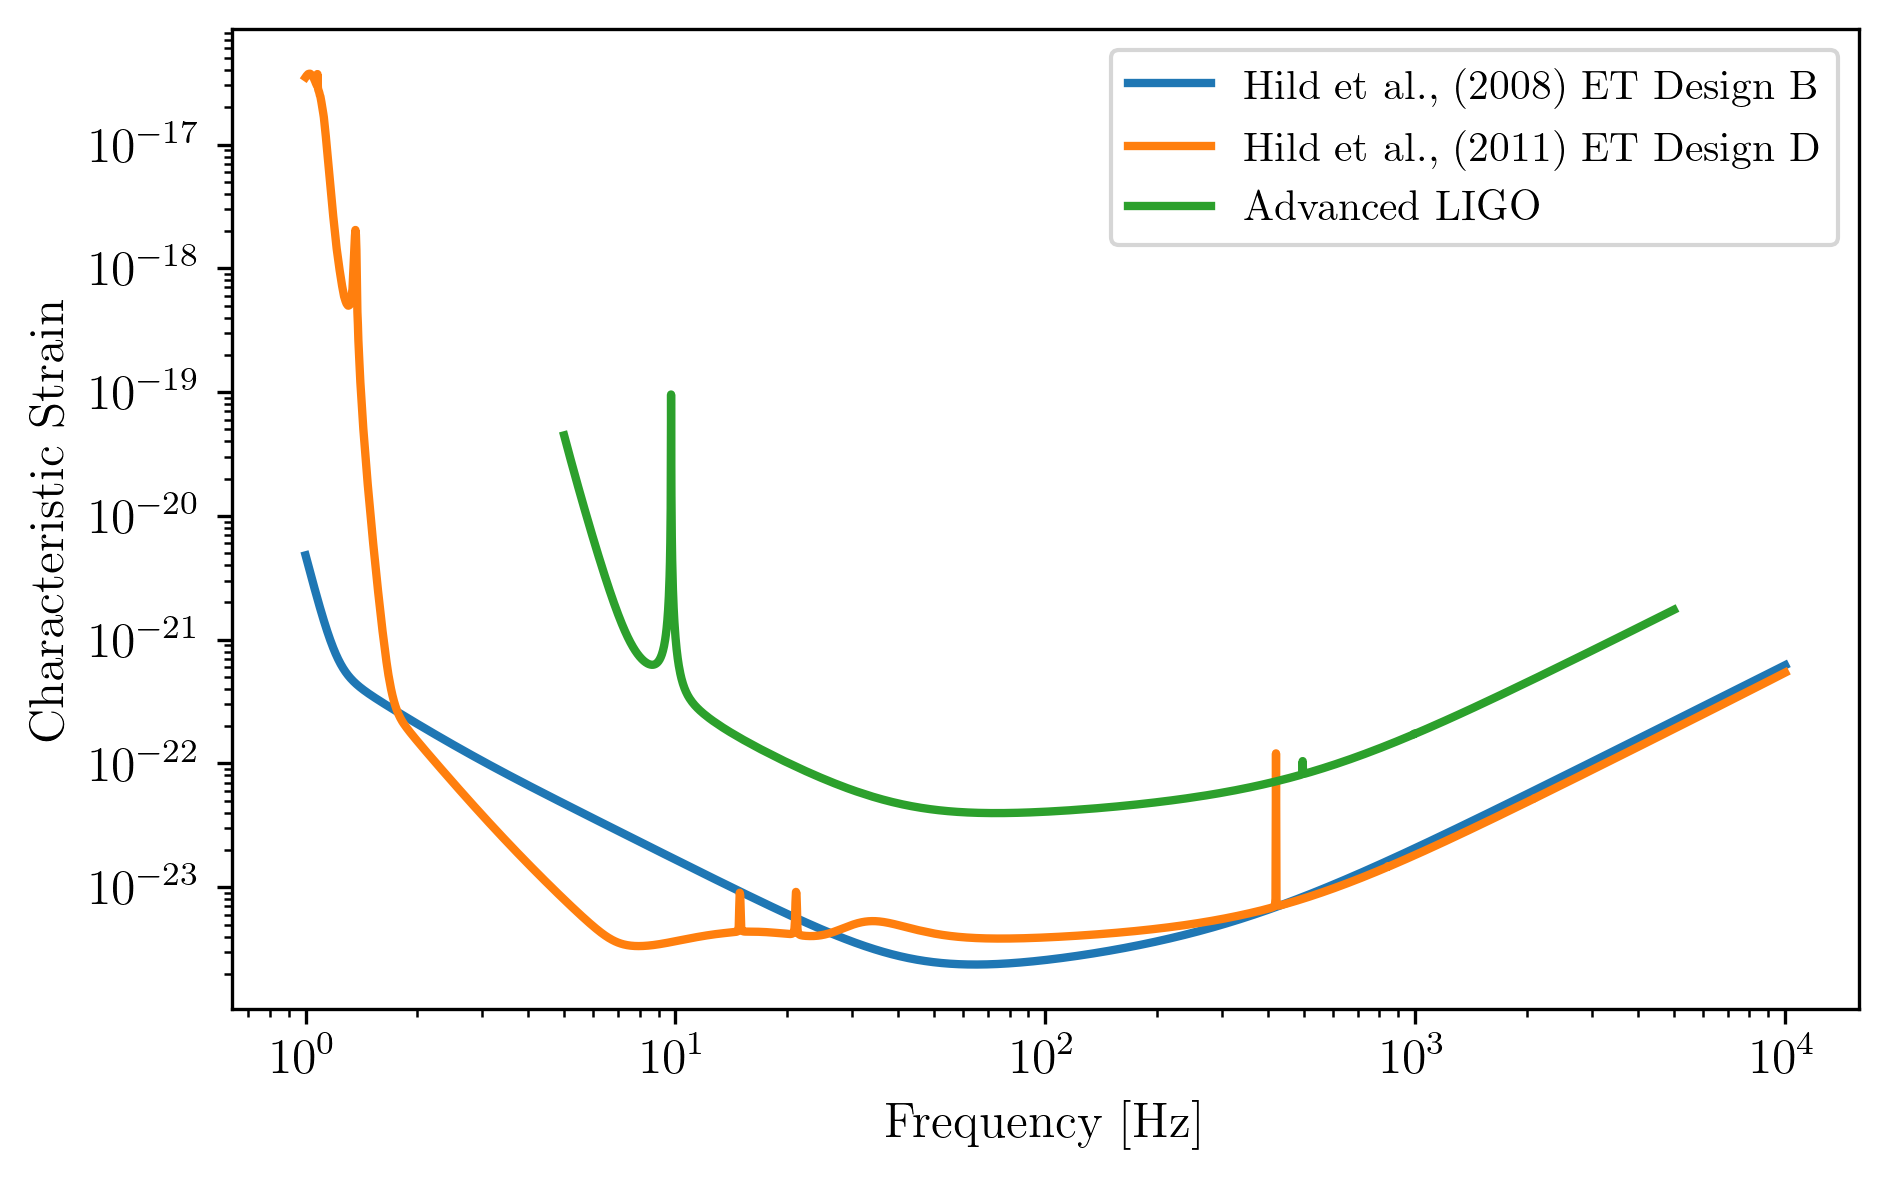

In [42]:
fig = plt.figure()
plt.loglog(ET_B.fT,ET_B.h_n_f,label='Hild et al., (2008) ET Design B')
#plt.loglog(ET_C.fT,ET_C.h_n_f,label='Einstein Telescope Design C')
plt.loglog(ET_D.fT,ET_D.h_n_f,label='Hild et al., (2011) ET Design D')
plt.loglog(aLIGO_1.fT,aLIGO_1.h_n_f,label='Advanced LIGO')
#plt.loglog(aLIGO_2.fT,aLIGO_2.h_n_f,label='Advanced LIGO 2')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
fig.savefig(save_directory+'all_ground_comp.pdf',bbox_inches='tight')
plt.show()

## Load LISA Instruments from File

#### LISA Example 1

Modelled off of the Science Requirements document from https://lisa.nasa.gov/documentsReference.html.

In [43]:
SpaceBased_T_obs = 4*u.yr

In [44]:
LISA_Other_filedirectory = load_directory + '/InstrumentFiles/LISA_Other/'
LISA_ex1_filename = 'LISA_Allocation_S_h_tot.txt'
LISA_ex1_filelocation = LISA_Other_filedirectory + LISA_ex1_filename

#`I_type` should be Effective Noise Spectral Density
LISA_ex1 = detector.SpaceBased('LISA Example 1',SpaceBased_T_obs,load_location=LISA_ex1_filelocation,I_type='E')

#### LISA Example 2

Modelled off of Robson,Cornish,and Liu 2018, LISA (https://arxiv.org/abs/1803.01944).

In [45]:
LISA_ex2_filedirectory = load_directory + '/InstrumentFiles/LISA_Other/'
LISA_ex2_filename = 'LISA_sensitivity.txt'
LISA_ex2_filelocation = LISA_ex2_filedirectory + LISA_ex2_filename

#`I_type` should be Effective Noise Spectral Density
LISA_ex2 = detector.SpaceBased('LISA Example 2',SpaceBased_T_obs,load_location=LISA_ex2_filelocation,I_type='E')

#### LISA Example 3

Generated by http://www.srl.caltech.edu/~shane/sensitivity/ who's method is based on Larson, Hiscock, and Hellings (2000)

In [46]:
LISA_ex3_filename = 'scg_6981.dat'
LISA_ex3_filelocation = LISA_Other_filedirectory + LISA_ex3_filename

#`I_type` should be Amplitude Spectral Density
LISA_ex3 = detector.SpaceBased('LISA Example 3',SpaceBased_T_obs,load_location=LISA_ex3_filelocation,I_type='A')

### Plots of loaded LISA examples.

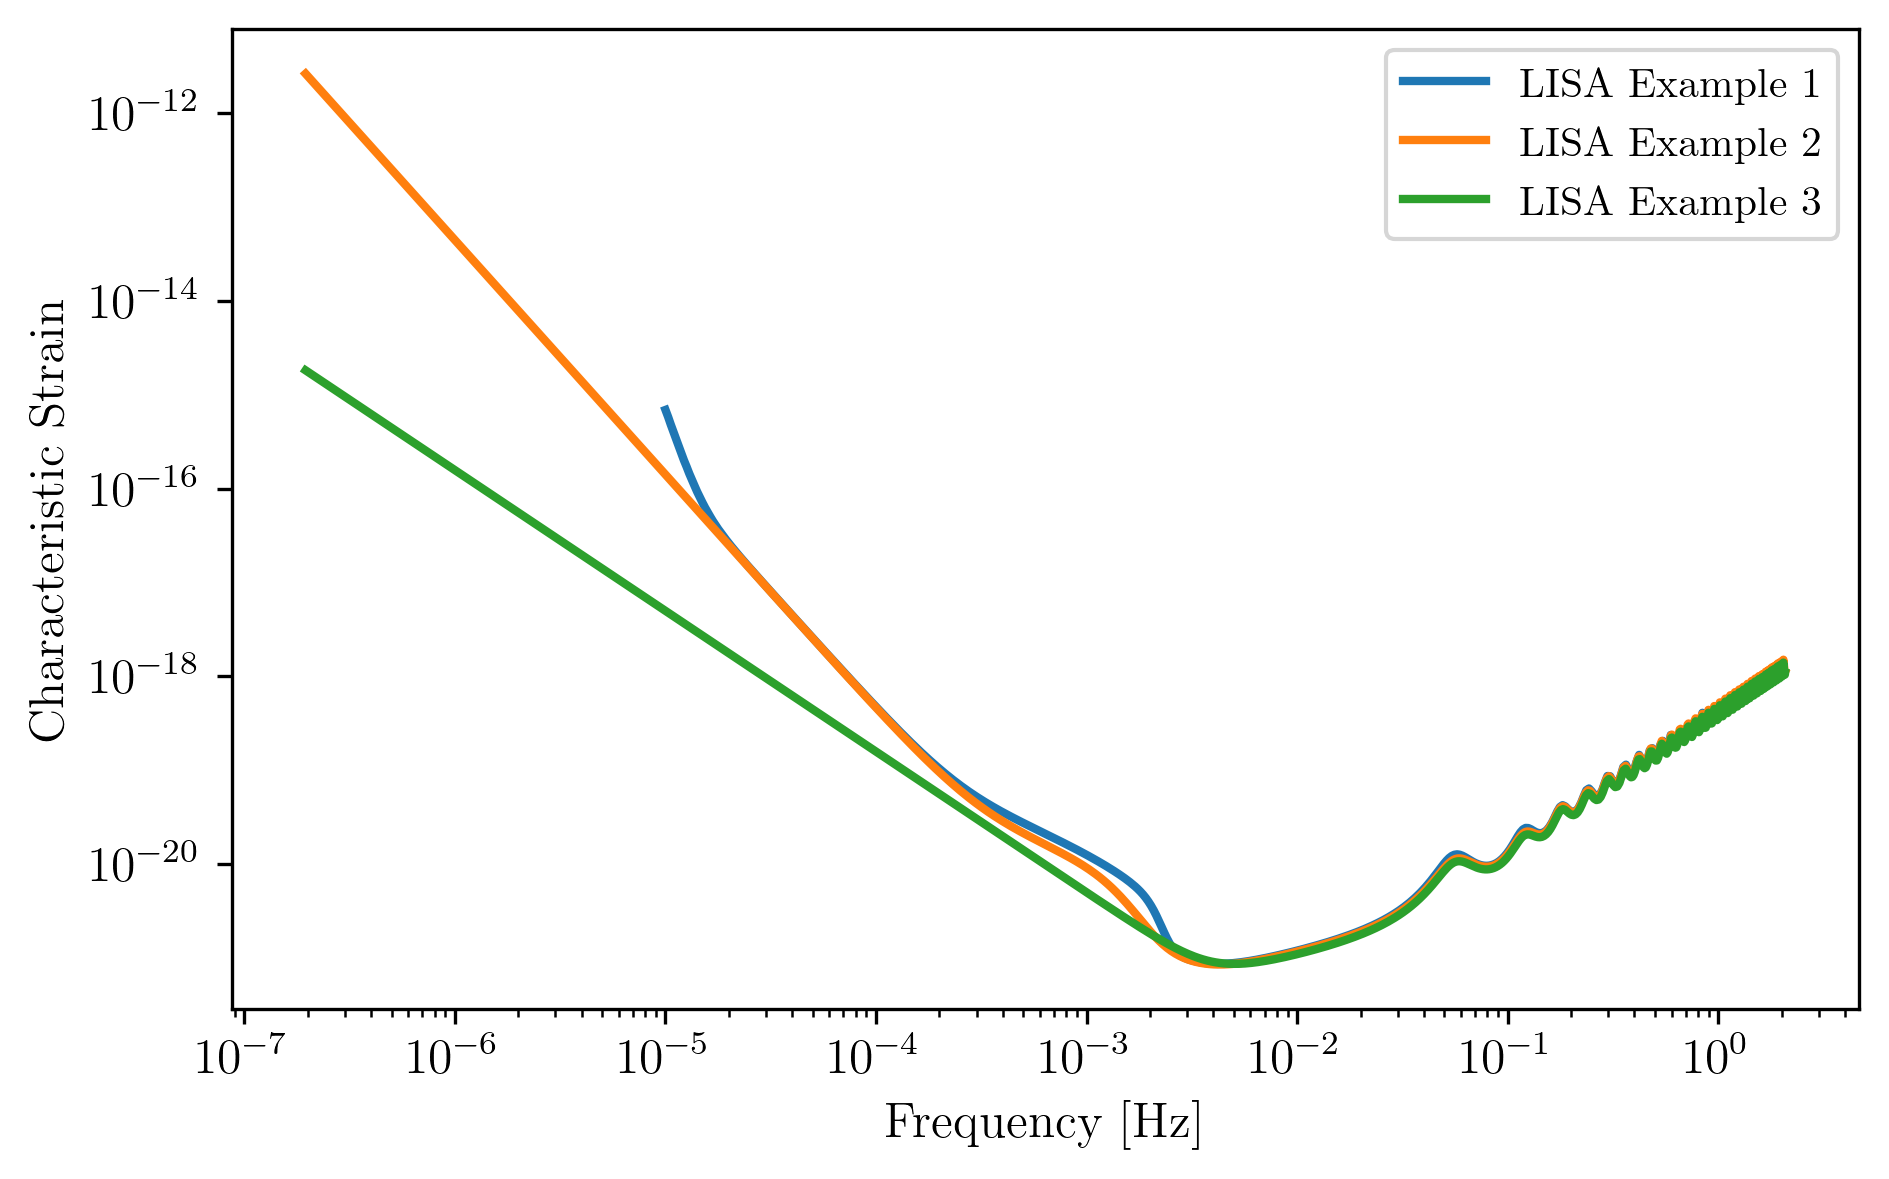

In [47]:
fig = plt.figure()
plt.loglog(LISA_ex1.fT,LISA_ex1.h_n_f,label=LISA_ex1.name)
plt.loglog(LISA_ex2.fT,LISA_ex2.h_n_f,label=LISA_ex2.name)
plt.loglog(LISA_ex3.fT,LISA_ex3.h_n_f,label=LISA_ex3.name)
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
plt.show()

## Loading PTA Detection Curves and Upper Limits

#### Simulated NANOGrav Continuous Wave Detection Sensitivity

Samples from Mingarelli, et al. 2017 (https://arxiv.org/abs/1708.03491) of the Simulated NANOGrav Continuous Wave Detection Sensitivity.

In [48]:
NANOGrav_filedirectory = load_directory + '/InstrumentFiles/NANOGrav/StrainFiles/' 

In [49]:
#NANOGrav continuous wave sensitivity
NANOGrav_background = 4e-16 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs = 15 #Observation years: 15,20,25

NANOGrav_filename = 'cw_simulation_Ared_' + str(NANOGrav_background) + '_dp_' + str(NANOGrav_dp) \
                    + '_fap_' + str(NANOGrav_fap) + '_T_' + str(NANOGrav_Tobs) + '.txt'
NANOGrav_filelocation = NANOGrav_filedirectory + NANOGrav_filename

NANOGrav_cw_GWB = detector.PTA('NANOGrav CW Detection w/ GWB',load_location=NANOGrav_filelocation,I_type='h')

In [50]:
#NANOGrav continuous wave sensitivity
NANOGrav_background_2 = 0 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp_2 = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap_2 = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs_2 = 15 #Observation years: 15,20,25

NANOGrav_filename_2 = 'cw_simulation_Ared_' + str(NANOGrav_background_2) + '_dp_' + str(NANOGrav_dp_2) \
                    + '_fap_' + str(NANOGrav_fap_2) + '_T_' + str(NANOGrav_Tobs_2) + '.txt'
NANOGrav_filelocation_2 = NANOGrav_filedirectory + NANOGrav_filename_2

NANOGrav_cw_no_GWB = detector.PTA('NANOGrav CW Detection no GWB',load_location=NANOGrav_filelocation_2,I_type='h')

#### NANOGrav Continuous Wave 11yr Upper Limit

Sample from Aggarwal, et al. 2019 (https://arxiv.org/abs/1812.11585) of the NANOGrav 11yr continuous wave upper limit.

In [51]:
NANOGrav_cw_ul_file = NANOGrav_filedirectory + 'smoothed_11yr.txt'
NANOGrav_cw_ul = detector.PTA('NANOGrav CW Upper Limit',load_location=NANOGrav_cw_ul_file,I_type='h')

#### NANOGrav 11yr Characteristic Strain

Using real NANOGrav 11yr data put through `hasasia`

In [52]:
NANOGrav_11yr_hasasia_file = NANOGrav_filedirectory + 'NANOGrav_11yr_S_eff.txt'
NANOGrav_11yr_hasasia = detector.PTA('NANOGrav 11yr',load_location=NANOGrav_11yr_hasasia_file,I_type='E')
NANOGrav_11yr_hasasia.T_obs = 11.4*u.yr

### Plots of the loaded PTAs

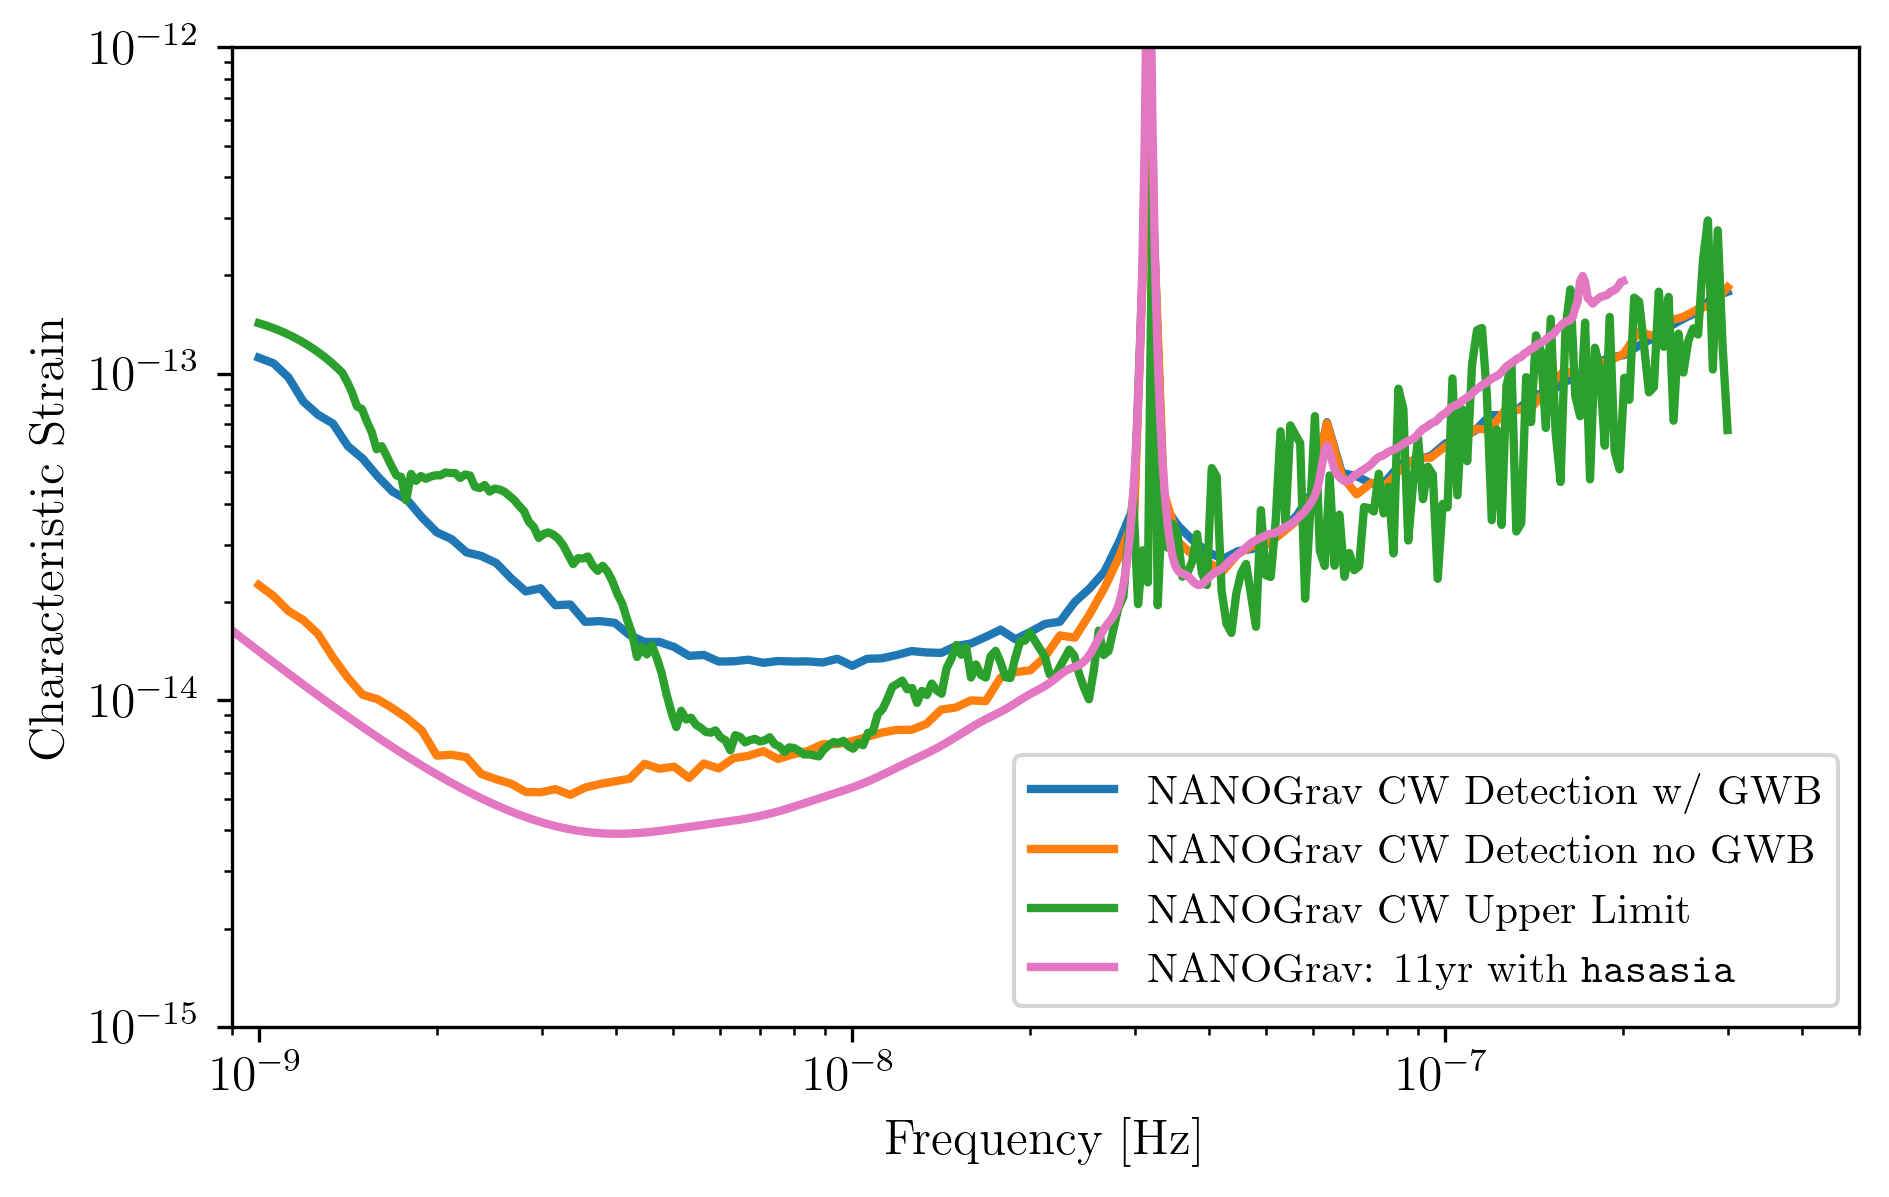

In [53]:
fig = plt.figure()
plt.loglog(NANOGrav_cw_GWB.fT,NANOGrav_cw_GWB.h_n_f,label = NANOGrav_cw_GWB.name)
plt.loglog(NANOGrav_cw_no_GWB.fT,NANOGrav_cw_no_GWB.h_n_f, label = NANOGrav_cw_no_GWB.name)
plt.loglog(NANOGrav_cw_ul.fT,NANOGrav_cw_ul.h_n_f, label = NANOGrav_cw_ul.name)
plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f, color='C6',
           label = r'NANOGrav: 11yr with \texttt{hasasia}')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([1e-15,1e-12])
plt.xlim([9e-10,5e-7])
plt.xlabel(r'Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='lower right')
plt.show()

## Generating PTAs with `gwent`

Generated using the code `hasasia` (https://hasasia.readthedocs.io/en/latest/) via the methods of Hazboun, Romano, and Smith, 2019 (https://arxiv.org/abs/1907.04341)

#### SKA-esque Detector

Fiducial parameter estimates from Sesana, Vecchio, and Colacino, 2008 (https://arxiv.org/abs/0804.4476) section 7.1.

In [54]:
sigma_SKA = 10*u.ns.to('s')*u.s #sigma_rms timing residuals in nanoseconds to seconds
T_SKA = 15*u.yr #Observing time in years
N_p_SKA = 200 #Number of pulsars
cadence_SKA = 1/(u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every week in [number/yr]

SKA with White noise only

In [55]:
SKA_WN = detector.PTA('SKA, WN Only',N_p_SKA,T_obs=T_SKA,sigma=sigma_SKA,cadence=cadence_SKA)

SKA with White and Varied Red Noise

In [56]:
SKA_WN_RN = detector.PTA('SKA, WN and RN',N_p_SKA,T_obs=T_SKA,sigma=sigma_SKA,cadence=cadence_SKA,
                         rn_amp=[1e-16,1e-12],rn_alpha=[-1/2,1.25])

SKA with White Noise and a Stochastic Gravitational Wave Background

In [57]:
SKA_WN_GWB = detector.PTA('SKA, WN and GWB',N_p_SKA,T_obs=T_SKA,sigma=sigma_SKA,cadence=cadence_SKA,
                          sb_amp=4e-16,sb_alpha=-2/3)

SKA with Sampled Noise for each pulsar, no GWB

In [58]:
T_realistic_SKA = np.concatenate((np.ones(34)*T_SKA.value,
                                  np.random.uniform(3.,T_SKA.value,size=(N_p_SKA-34))),axis=0)
print(len(T_realistic_SKA))

200


In [60]:
SKA_Sampled_Noise = detector.PTA('SKA, Sampled Noise',N_p_SKA,cadence=[cadence_SKA,cadence_SKA/4.],
                                 sigma=[sigma_SKA,10*sigma_SKA],T_obs=T_realistic_SKA,use_11yr=True,use_rn=True)

In [61]:
SKA_Sampled_Noise.h_n_f
print(SKA_Sampled_Noise.var_dict)

{'n_p': {'val': 200, 'min': None, 'max': None, 'sampled': False}, 'cadence': {'val': array([10.27464526, 28.17820638, 10.62298886, 11.06818182, 10.88796343,
       25.71817212, 21.00419847, 23.08925346, 20.86891273, 24.08064159,
       18.0337789 , 23.98913776, 23.33733459, 12.28642097, 21.04800147,
       40.78655483,  8.78552339, 10.01542416, 19.52456056, 25.82839286,
       12.44160584,  9.59899777, 27.21085735,  9.9427542 , 20.06769684,
       10.8307571 , 12.62592593, 25.12894391, 14.75757576, 20.17955801,
       17.33359698, 12.87434726, 25.4583926 , 13.41364764, 39.62302898,
       33.07769841, 18.94377517, 15.8335139 , 37.12146087, 46.76263171,
       48.56785548, 19.77896781, 24.19831707, 42.00840511, 37.60360067,
       24.31197679, 35.82480065, 38.34496093, 51.62341685, 18.42886129,
       28.03656708, 30.67200363, 28.27481393, 43.22435389, 36.71649445,
       30.13225666, 42.53837753, 50.30147183, 21.94853018, 40.58415488,
       49.3517834 , 22.34361075, 35.29476584, 51.70

### Plots for Simulated SKA PTAs

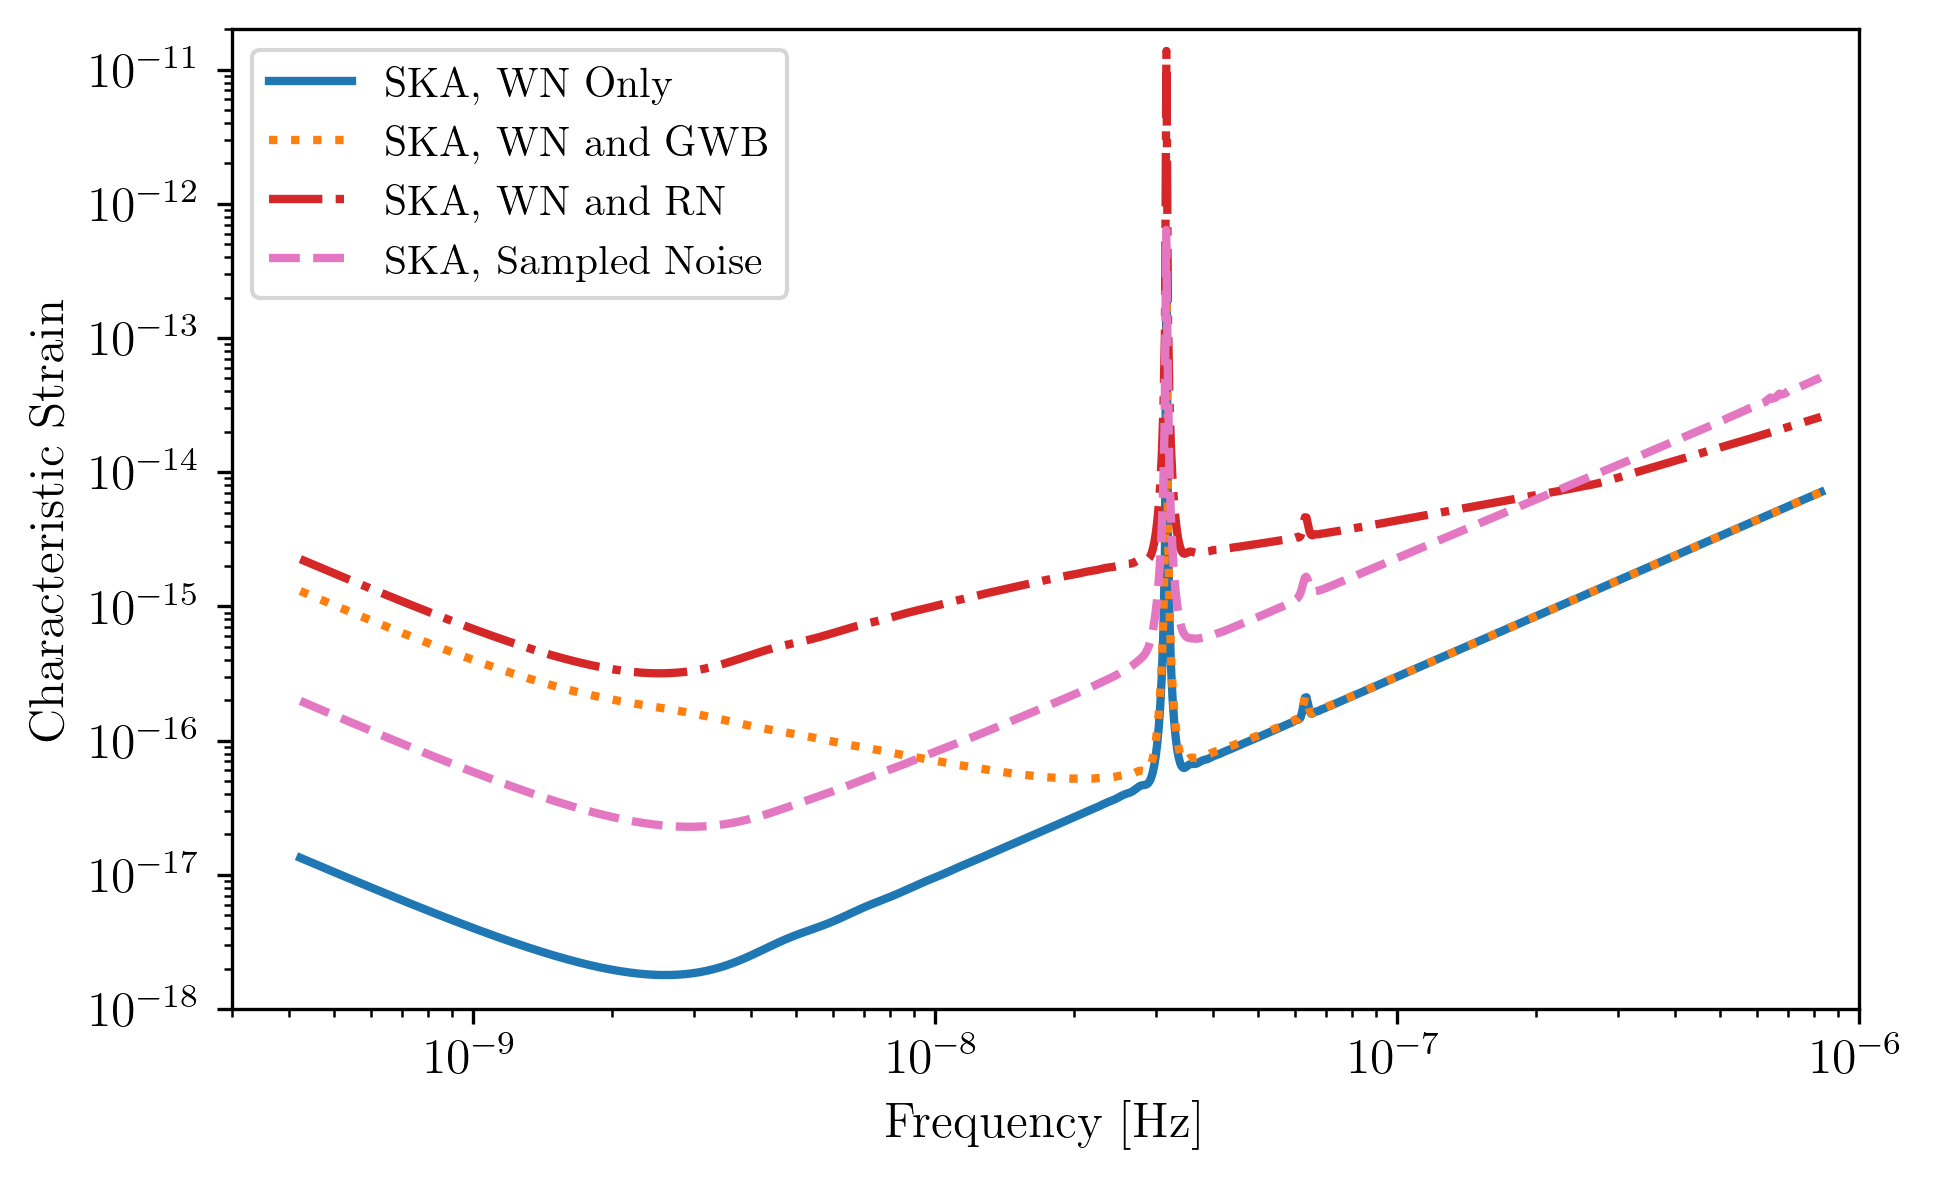

In [62]:
fig = plt.figure()
plt.loglog(SKA_WN.fT,SKA_WN.h_n_f, color = 'C0',label = SKA_WN.name)
plt.loglog(SKA_WN_GWB.fT,SKA_WN_GWB.h_n_f, linestyle=':', color = 'C1',label = SKA_WN_GWB.name)
plt.loglog(SKA_WN_RN.fT,SKA_WN_RN.h_n_f, linestyle='-.', color = 'C3',label = SKA_WN_RN.name)
plt.loglog(SKA_Sampled_Noise.fT,SKA_Sampled_Noise.h_n_f, color = 'C6',linestyle='--',label=SKA_Sampled_Noise.name)

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([1e-18,2e-11])
plt.xlim([3e-10,1e-6])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left')
plt.show()

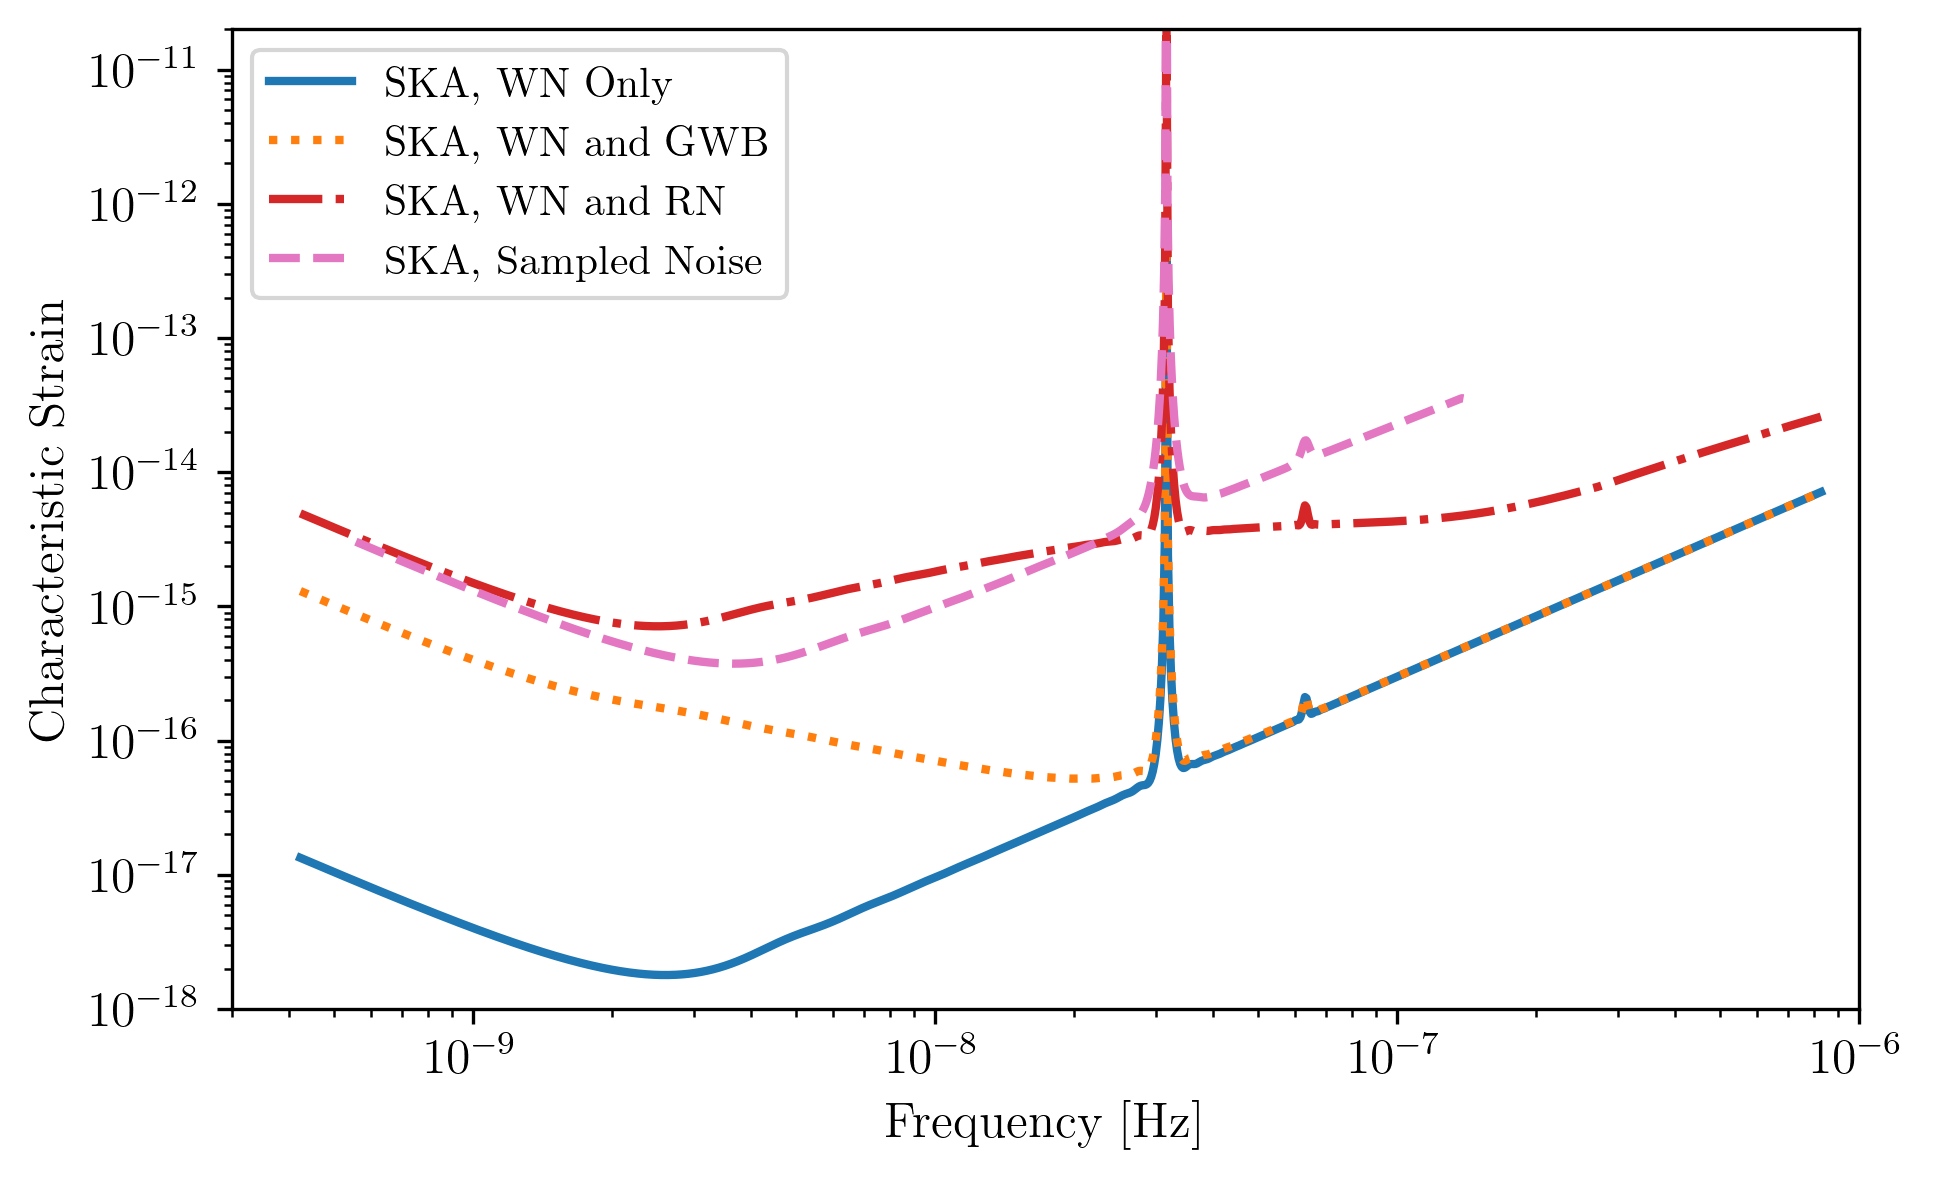

In [73]:
fig = plt.figure()
plt.loglog(SKA_WN.fT,SKA_WN.h_n_f, color = 'C0',label = SKA_WN.name)
plt.loglog(SKA_WN_GWB.fT,SKA_WN_GWB.h_n_f, linestyle=':', color = 'C1',label = SKA_WN_GWB.name)
plt.loglog(SKA_WN_RN.fT,SKA_WN_RN.h_n_f, linestyle='-.', color = 'C3',label = SKA_WN_RN.name)
plt.loglog(SKA_Sampled_Noise.fT,SKA_Sampled_Noise.h_n_f, color = 'C6',linestyle='--',label=SKA_Sampled_Noise.name)

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([1e-18,2e-11])
plt.xlim([3e-10,1e-6])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left')
plt.show()

#### NANOGrav-esque Detector

Fiducial 11yr parameter estimates from Arzoumanian, et al., 2018 https://arxiv.org/abs/1801.01837

In [20]:
###############################################
#NANOGrav calculation using 11.5yr parameters https://arxiv.org/abs/1801.01837
sigma_nano = 100*u.ns.to('s')*u.s #rms timing residuals in nanoseconds to seconds
T_nano = 11.4*u.yr #Observing time in years
N_p_nano = 34 #Number of pulsars
cadence_nano = 1/(2*u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every 2 weeks in number/year

NANOGrav with White Noise only

In [22]:
NANOGrav_WN = detector.PTA('NANOGrav, WN Only',N_p_nano,T_obs=T_nano,sigma=sigma_nano,cadence=cadence_nano)
NANOGrav_WN.fT
NANOGrav_WN.h_n_f;
#print(NANOGrav_WN.var_dict)

NANOGrav with White and Varied Red Noise

In [23]:
NANOGrav_WN_RN = detector.PTA('NANOGrav, WN and RN',N_p_nano,T_obs=T_nano,sigma=sigma_nano,cadence=cadence_nano,
                              rn_amp=[1e-16,1e-12],rn_alpha=[-1/2,1.25])
NANOGrav_WN_RN.h_n_f;

NANOGrav with White Noise and a Stochastic Gravitational Wave Background

In [24]:
NANOGrav_WN_GWB = detector.PTA('NANOGrav, WN and GWB',N_p_nano,
                               T_obs=T_nano,sigma=sigma_nano,cadence=cadence_nano,sb_amp=4e-16)
NANOGrav_WN_GWB.h_n_f;

NANOGrav with Sampled Noise for each pulsar, no GWB

In [25]:
NANOGrav_Sampled_Noise = detector.PTA('NANOGrav, Sampled Noise',N_p_nano,use_11yr=True,use_rn=True)
NANOGrav_Sampled_Noise.h_n_f;
[NANOGrav_T_obs,_,_,NANOGrav_cadences,NANOGrav_sigmas,
 NANOGrav_rn_amps,NANOGrav_rn_alphas] = NANOGrav_Sampled_Noise._NANOGrav_11yr_params

In [26]:
NANOGrav_Sampled_Noise_GWB = detector.PTA('NANOGrav, Sampled Noise and GWB',
                                          N_p_nano,use_11yr=True,use_rn=True,sb_amp=4e-16)


In [27]:
print(min(NANOGrav_sigmas)/1e-9)
print(max(NANOGrav_sigmas)/1e-9)
print(min(np.log10(NANOGrav_rn_amps)))
print(max(np.log10(NANOGrav_rn_amps)))
print(3-2*min(NANOGrav_rn_alphas))
print(3-2*max(NANOGrav_rn_alphas))

107.99999999999999
3649.9999999999995
-19.8803
-12.2051
6.69937
0.055575699999999895


In [28]:
print(np.max(NANOGrav_Sampled_Noise.cadence.to('1/s')/2))

6.462239655779966e-07 1 / s


In [33]:
print(np.min(NANOGrav_Sampled_Noise_GWB.h_n_f))
print(np.min(NANOGrav_11yr_hasasia.h_n_f))
print(np.min(NANOGrav_11yr_hasasia.h_n_f)/np.min(NANOGrav_Sampled_Noise_GWB.h_n_f))

1.208517617325395e-15
3.906101583706066e-15
3.2321428564283337


### Plots for Simulated NANOGrav PTAs

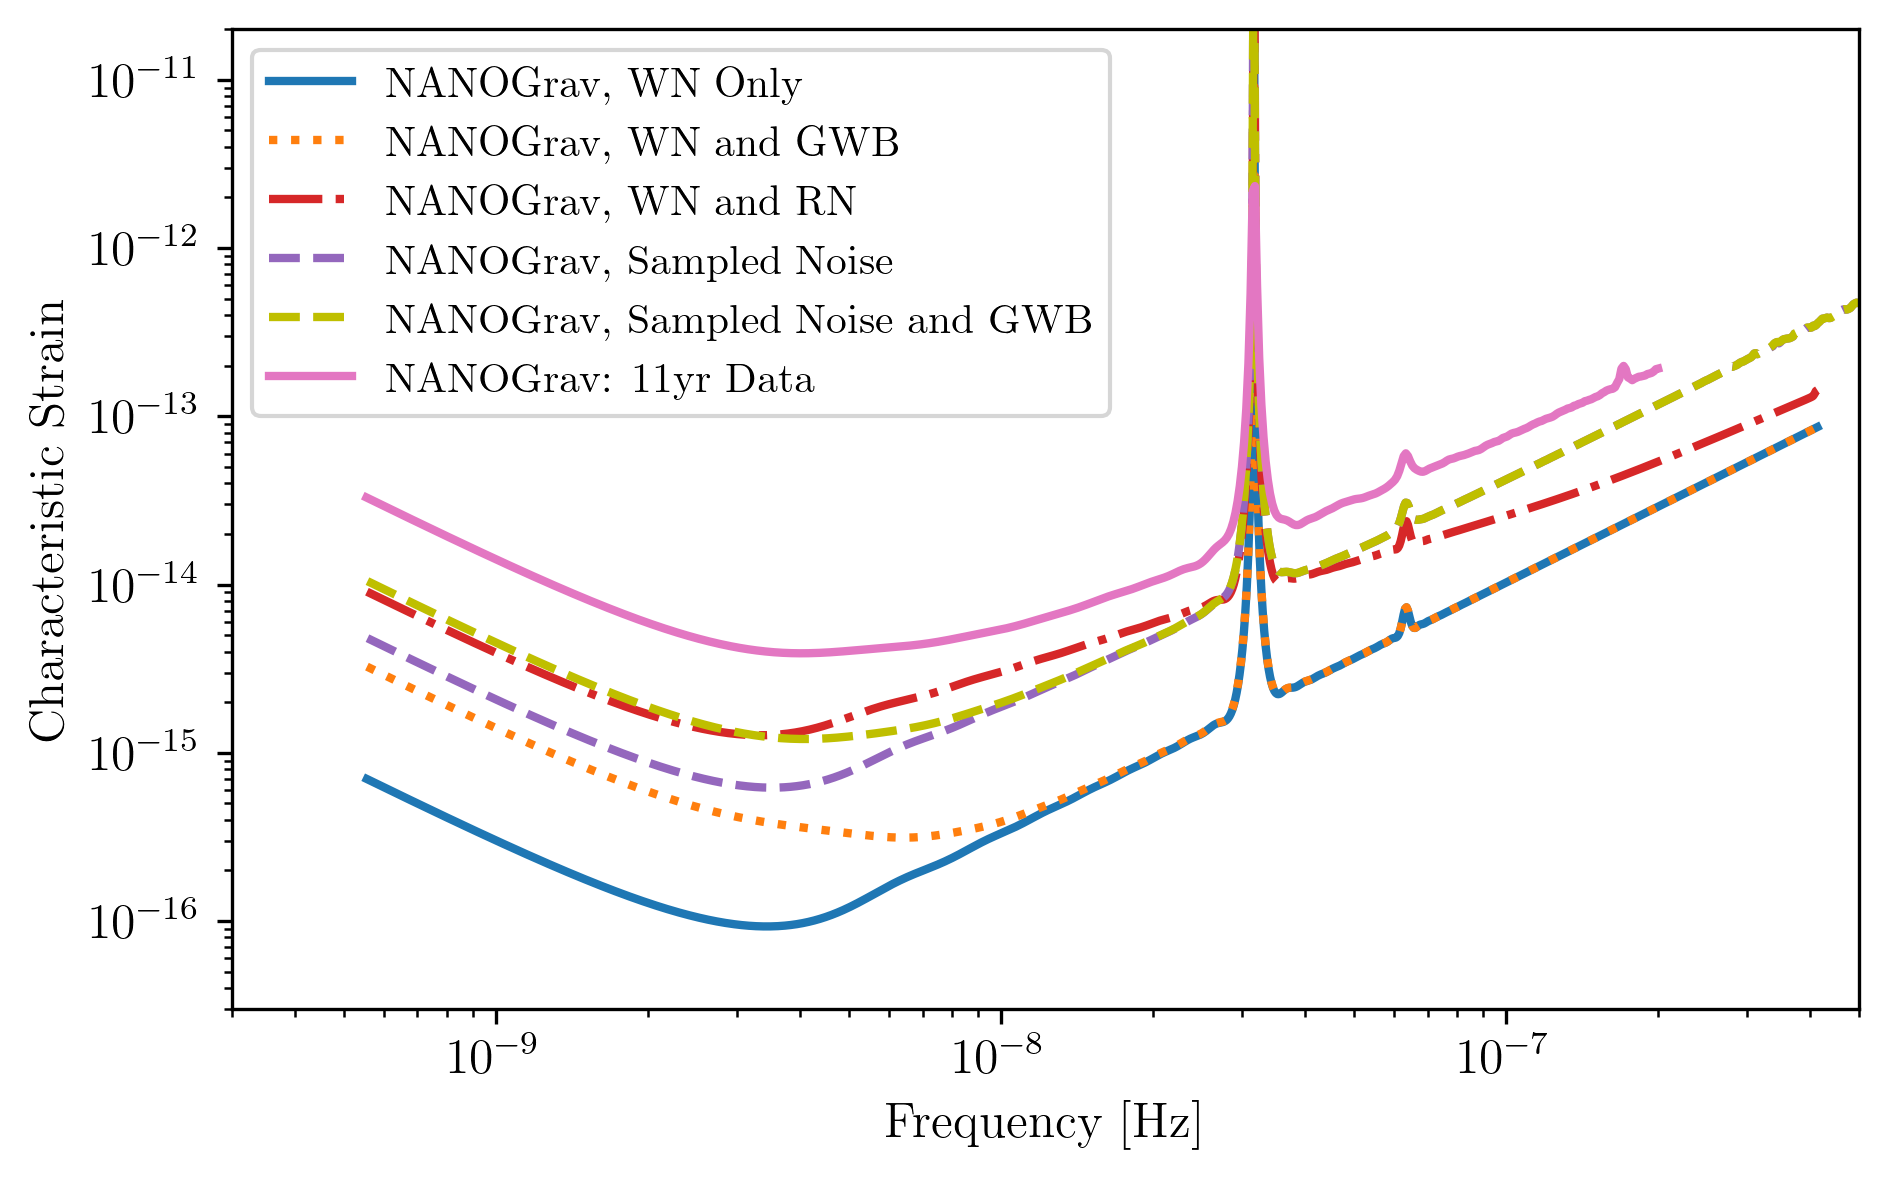

In [29]:
fig = plt.figure()
plt.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f,color = 'C0',
           label=NANOGrav_WN.name)
plt.loglog(NANOGrav_WN_GWB.fT,NANOGrav_WN_GWB.h_n_f,color = 'C1',
           linestyle=':',label=NANOGrav_WN_GWB.name)
plt.loglog(NANOGrav_WN_RN.fT,NANOGrav_WN_RN.h_n_f,color = 'C3',
           linestyle='-.',label=NANOGrav_WN_RN.name)
plt.loglog(NANOGrav_Sampled_Noise.fT,NANOGrav_Sampled_Noise.h_n_f,color = 'C4',
           linestyle='--',label=NANOGrav_Sampled_Noise.name)
plt.loglog(NANOGrav_Sampled_Noise_GWB.fT,NANOGrav_Sampled_Noise_GWB.h_n_f,color = 'y',
           linestyle='--',label=NANOGrav_Sampled_Noise_GWB.name)

plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f, color = 'C6',
           label = r'NANOGrav: 11yr Data')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([3e-17,2e-11])
plt.xlim([3e-10,5e-7])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left')
plt.show()

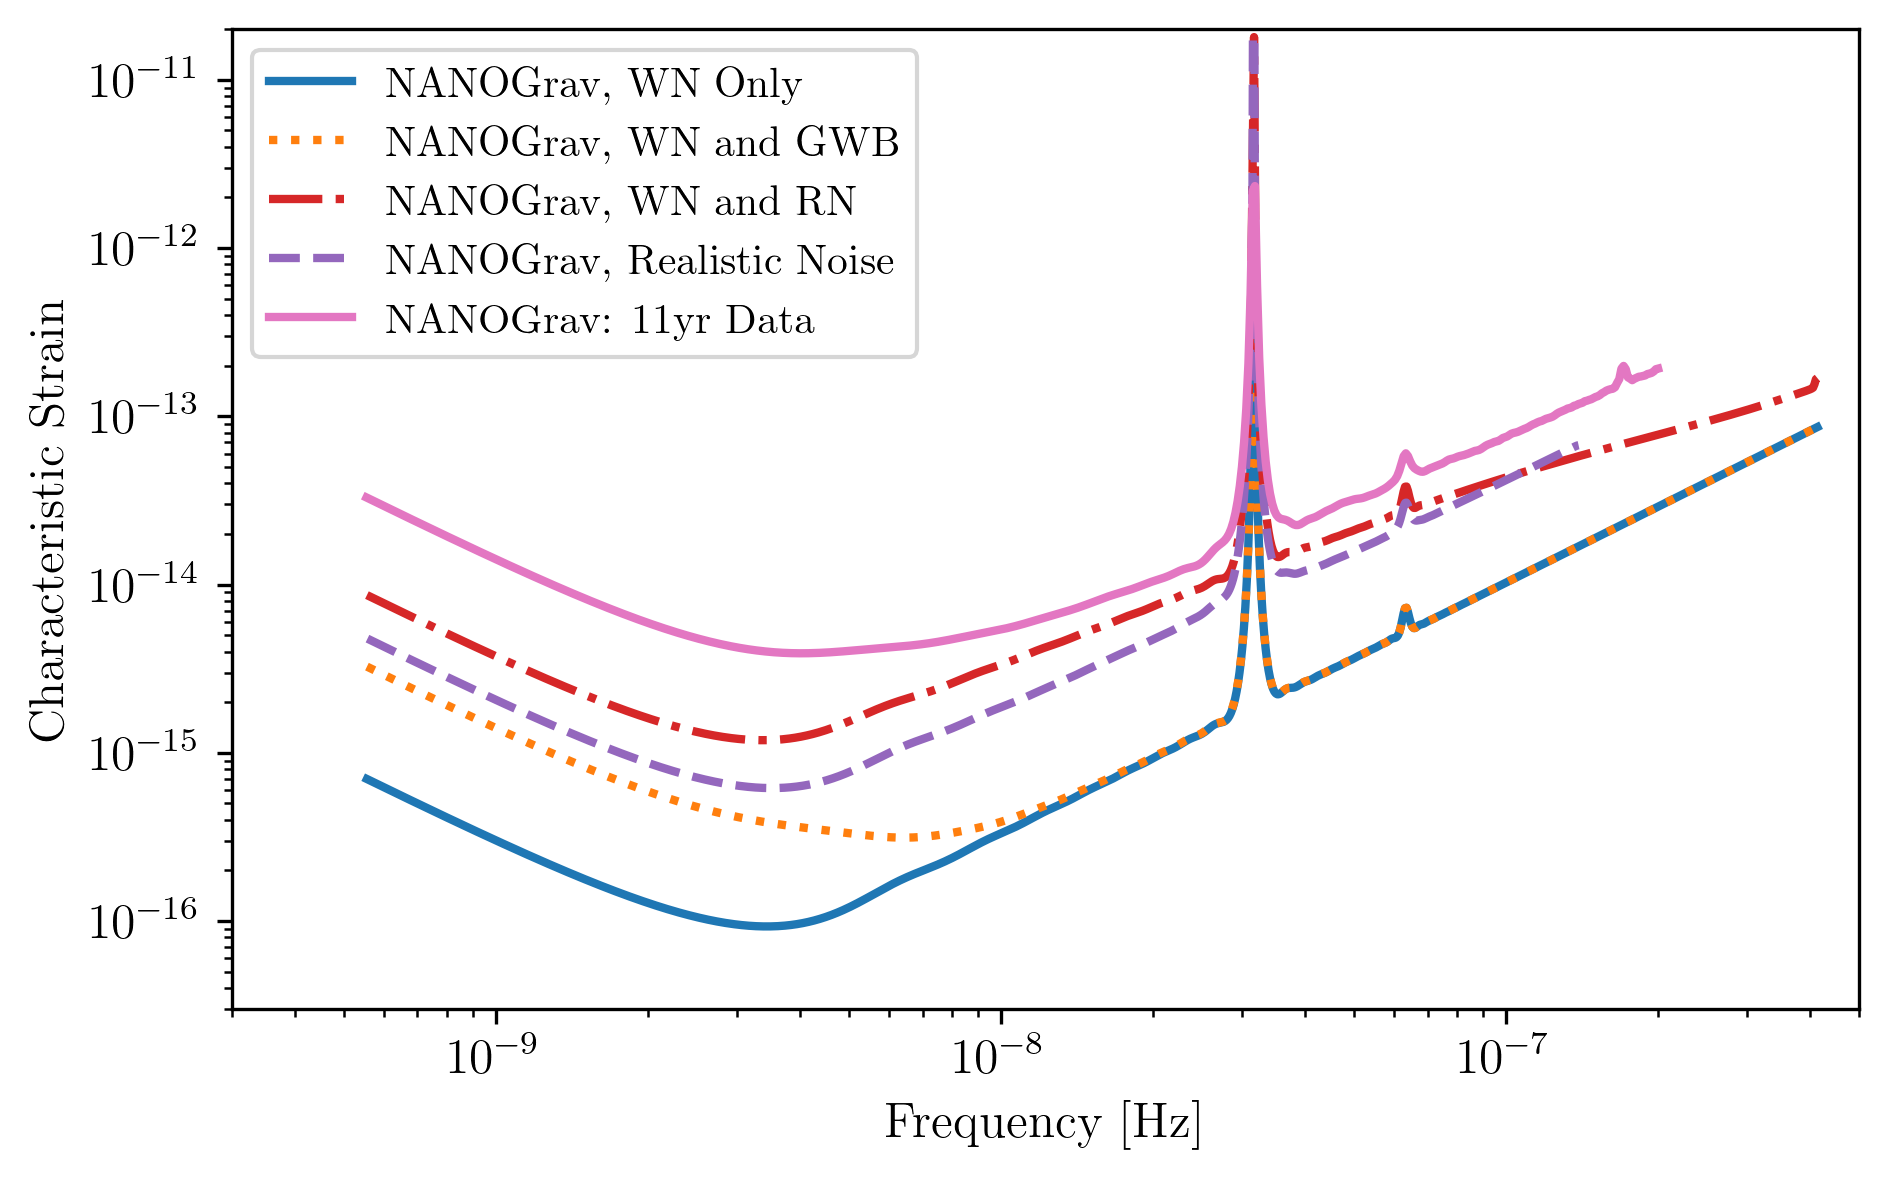

In [63]:
fig = plt.figure()
plt.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f,color = 'C0',
           label=NANOGrav_WN.name)
plt.loglog(NANOGrav_WN_GWB.fT,NANOGrav_WN_GWB.h_n_f,color = 'C1',
           linestyle=':',label=NANOGrav_WN_GWB.name)
plt.loglog(NANOGrav_WN_RN.fT,NANOGrav_WN_RN.h_n_f,color = 'C3',
           linestyle='-.',label=NANOGrav_WN_RN.name)
plt.loglog(NANOGrav_Sampled_Noise.fT,NANOGrav_Sampled_Noise.h_n_f,color = 'C4',
           linestyle='--',label=NANOGrav_Sampled_Noise.name)

plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f, color = 'C6',
           label = r'NANOGrav: 11yr Data')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([3e-17,2e-11])
plt.xlim([3e-10,5e-7])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left')
plt.show()

#### Scaling PTA relation
Taken from Moore, Taylor, and Gair (2015) 

In [33]:
def scaling_PTA_strain(instrument):
    T_obs = instrument.T_obs.to('s')
    cadence = instrument.cadence.to('1/s')

    P_w = instrument.sigma**2*(1/cadence) #Avg white noise from pulsar arrays [s**2/Hz]

    SNR = 3.0 # Value of 3 is Used in paper
    chi_corr = 1/np.sqrt(3) #Sky averaged geometric factor eqn. 11
    overlap_freq = 2/T_obs

    h_c_high_factor = (16*SNR**2/(3*chi_corr**4*instrument.N_p*(instrument.N_p-1)))**(1/4)*np.sqrt(P_w/2/T_obs)
    h_c_low_factor = 3*np.sqrt(SNR)/(2**(7/4)*chi_corr*np.pi**3)*(13/instrument.N_p/(instrument.N_p-1))**(1/4)*np.sqrt(P_w/2/T_obs)*T_obs**(-3)

    phi = np.arccos(h_c_low_factor/h_c_high_factor*overlap_freq**(-3))

    h_c_high = h_c_high_factor*instrument.fT
    h_c_low = h_c_low_factor*instrument.fT**(-2)*(1/np.cos(phi))

    h_c = h_c_low + h_c_high #Below eqn 16, should it be added in quad?
    return instrument.fT,h_c

In [34]:
NANOGrav_WN_scaled_fT,NANOGrav_WN_scaled_h_n_f = scaling_PTA_strain(NANOGrav_WN)
SKA_WN_scaled_fT,SKA_WN_scaled_h_n_f = scaling_PTA_strain(SKA_WN)

### Plot all paper PTAs

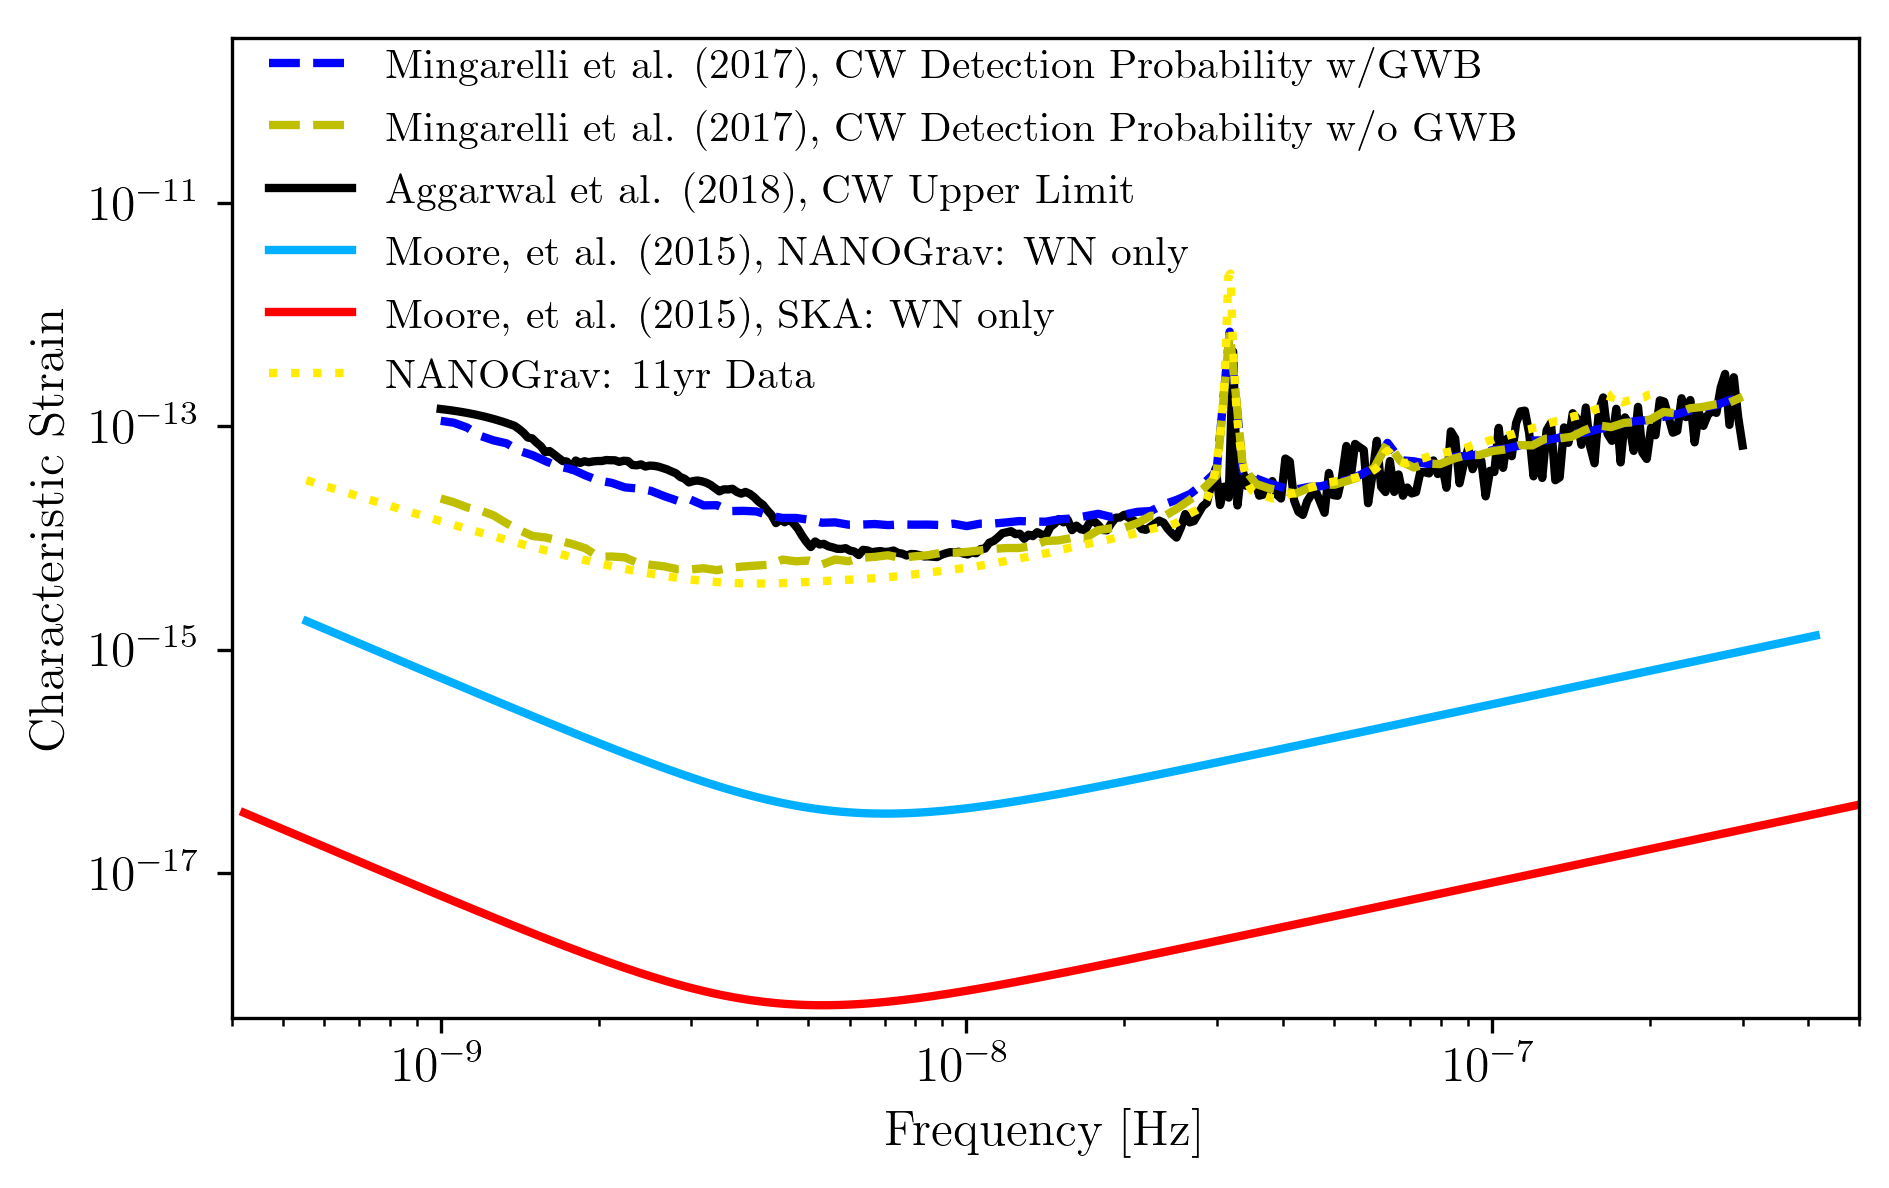

In [35]:
fig = plt.figure()
plt.loglog(NANOGrav_cw_GWB.fT,NANOGrav_cw_GWB.h_n_f, linestyle='--',
           color='b',label = r'Mingarelli et al. (2017), CW Detection Probability w/GWB')
plt.loglog(NANOGrav_cw_no_GWB.fT,NANOGrav_cw_no_GWB.h_n_f,linestyle='--',
           color='y',label = r'Mingarelli et al. (2017), CW Detection Probability w/o GWB')
plt.loglog(NANOGrav_cw_ul.fT,NANOGrav_cw_ul.h_n_f,
           color='k',label = r'Aggarwal et al. (2018), CW Upper Limit',zorder=-1)

plt.loglog(NANOGrav_WN_scaled_fT,NANOGrav_WN_scaled_h_n_f,
           color=cm.hsv(colornorm(2.8)),label = r'Moore, et al. (2015), NANOGrav: WN only')
plt.loglog(SKA_WN_scaled_fT,SKA_WN_scaled_h_n_f,
           color='r',label = r'Moore, et al. (2015), SKA: WN only')

plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,linestyle=':',
           color=cm.hsv(colornorm(0.8)),label = r'NANOGrav: 11yr Data')

#plt.tick_params(axis = 'both',which = 'major')
plt.ylim([5e-19,3e-10])
plt.xlim([4e-10,5e-7])
plt.xlabel(r'Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left',markerscale=.5,fancybox=True,framealpha=0.0,bbox_to_anchor=(0.0, 1.03))
fig.savefig(save_directory+'other_pta_sens_comp.pdf',bbox_inches='tight')
plt.show()

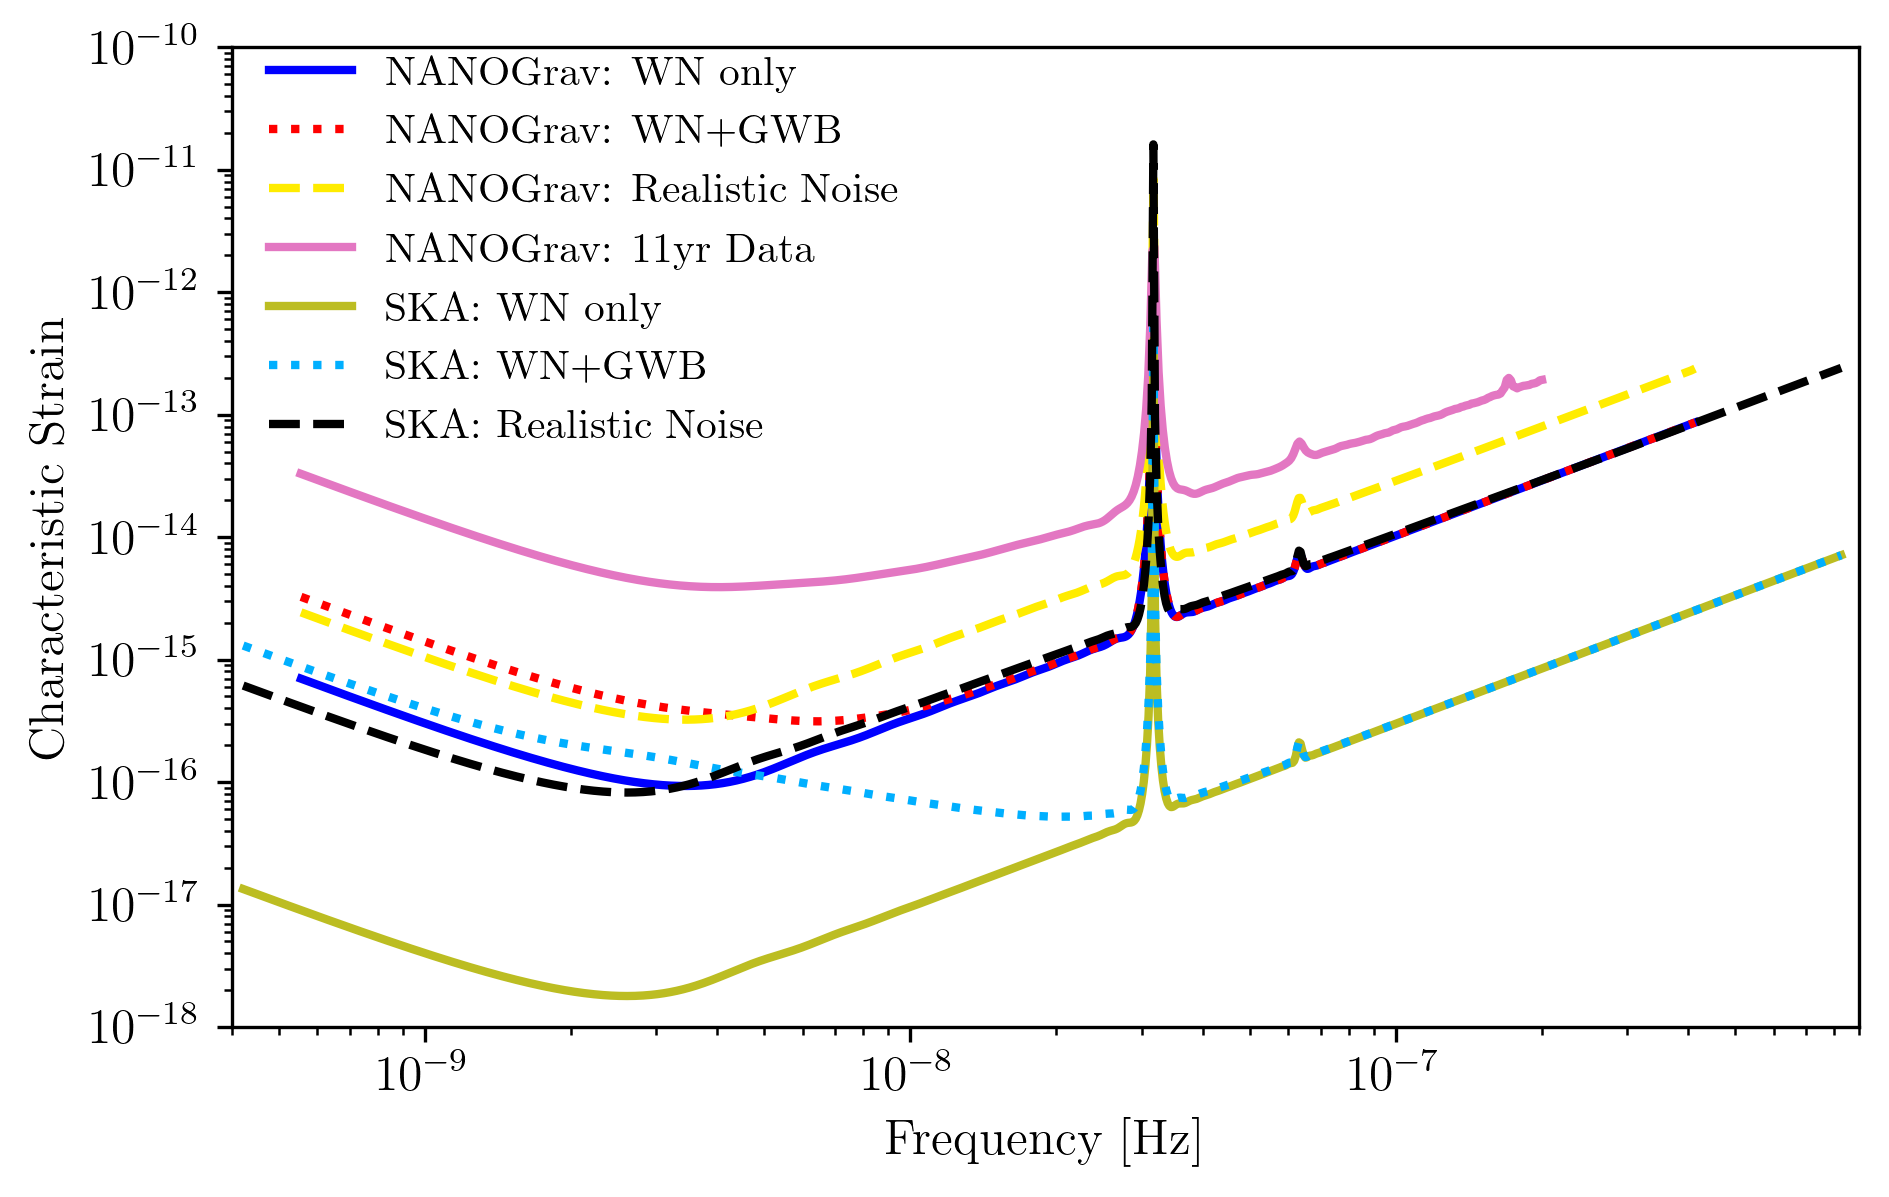

In [36]:
fig = plt.figure()
plt.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f,\
           color = 'b',label=r'NANOGrav: WN only')
plt.loglog(NANOGrav_WN_GWB.fT,NANOGrav_WN_GWB.h_n_f,\
           color = 'r',linestyle=':',
           label=r'NANOGrav: WN+GWB')
plt.loglog(NANOGrav_Sampled_Noise.fT,NANOGrav_Sampled_Noise.h_n_f,\
           color = cm.hsv(colornorm(0.8)),linestyle='--',
           label=r'NANOGrav: Sampled Noise')

plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,
           color = 'C6', label = r'NANOGrav: 11yr Data')

plt.loglog(SKA_WN.fT,SKA_WN.h_n_f,
           color = 'C8',label = r'SKA: WN only')
plt.loglog(SKA_WN_GWB.fT,SKA_WN_GWB.h_n_f,linestyle=':',\
           color = cm.hsv(colornorm(2.8)),label = r'SKA: WN+GWB')
plt.loglog(SKA_Sampled_Noise.fT,SKA_Sampled_Noise.h_n_f,\
           color = 'k',linestyle='--',label=r'SKA: Sampled Noise')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([1e-18,1e-10])
plt.xlim([4e-10,9e-7])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left',fancybox=True,framealpha=0.0,bbox_to_anchor=(0.0, 1.03))
fig.savefig(save_directory+'hasasia_pta_comp.pdf',bbox_inches='tight')
plt.show()

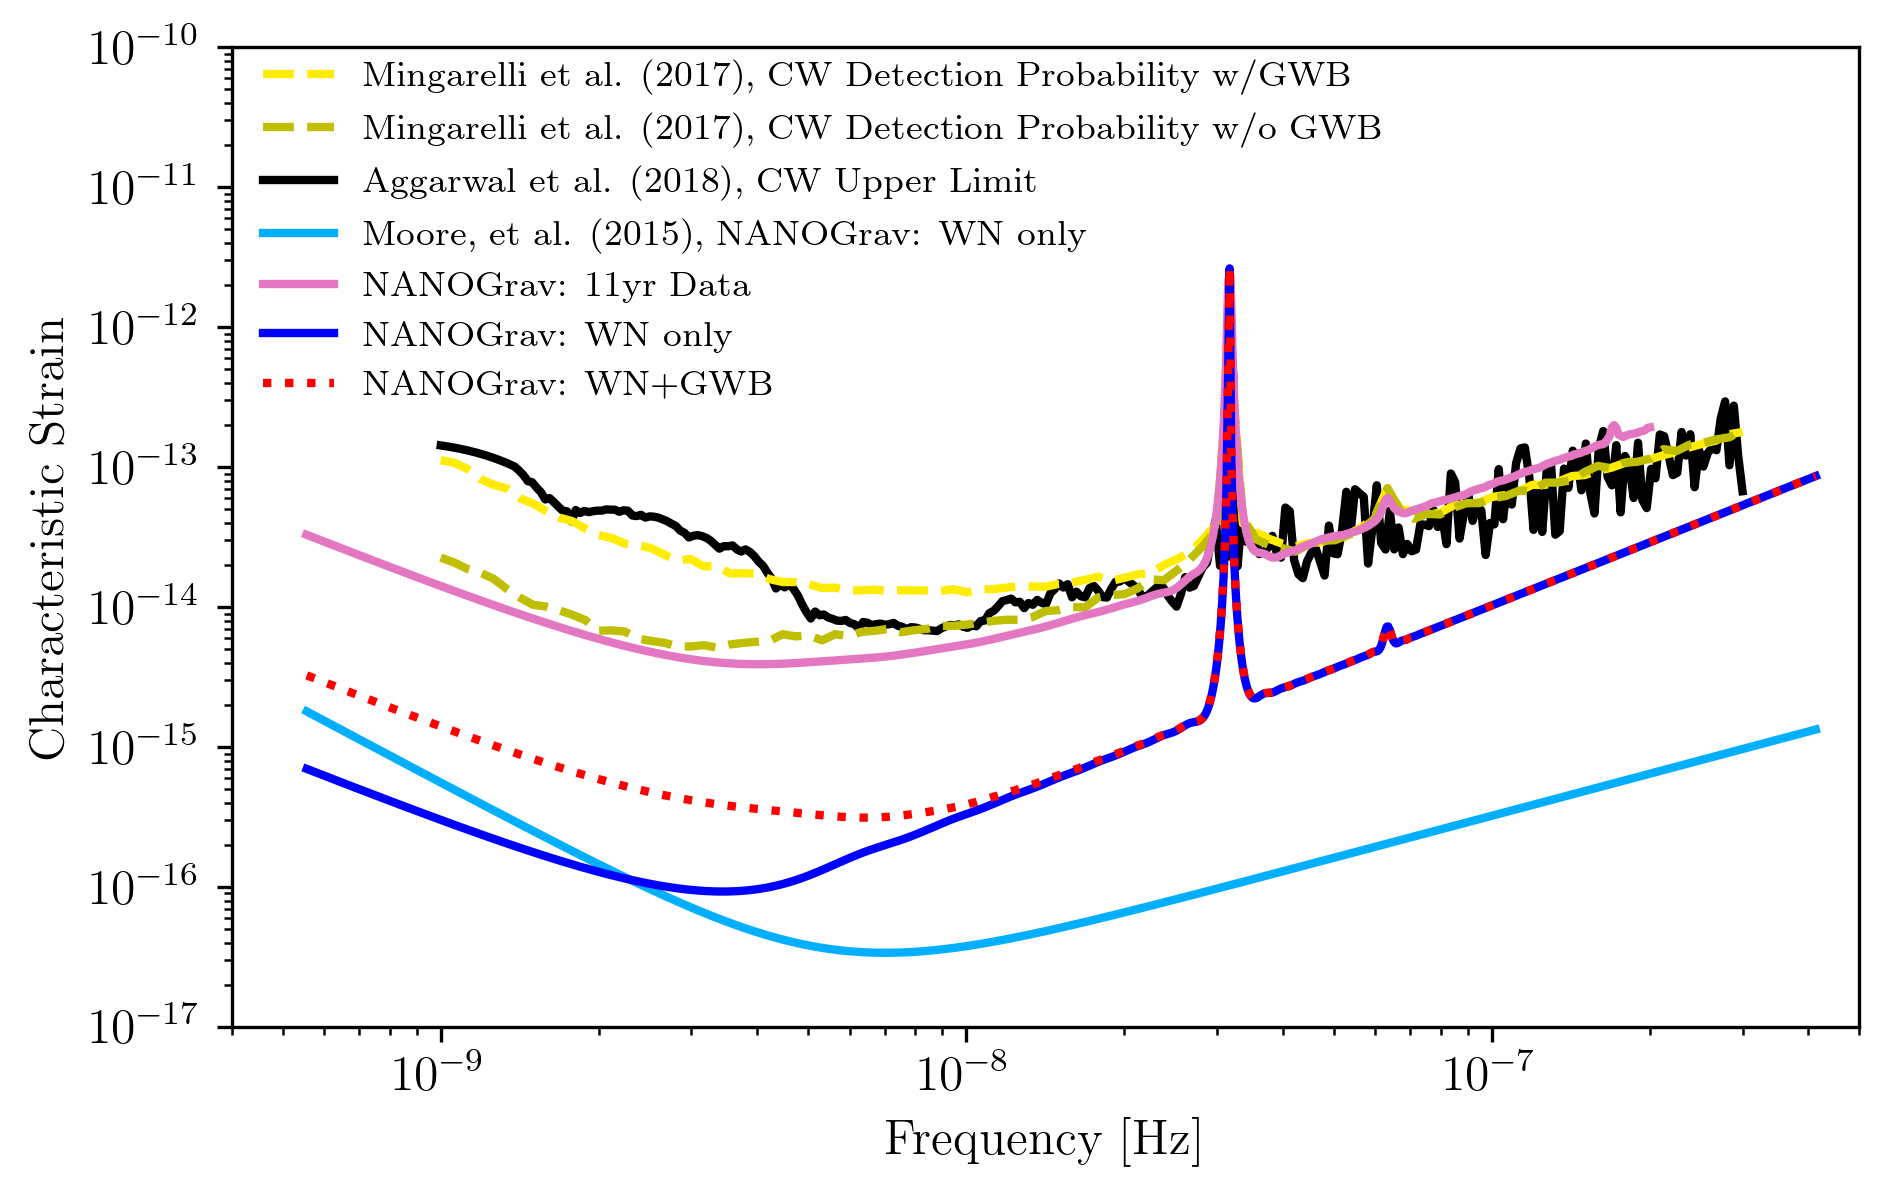

In [37]:
fig = plt.figure()
plt.loglog(NANOGrav_cw_GWB.fT,NANOGrav_cw_GWB.h_n_f, linestyle='--',
           color=cm.hsv(colornorm(0.8)),label = r'Mingarelli et al. (2017), CW Detection Probability w/GWB')

plt.loglog(NANOGrav_cw_no_GWB.fT,NANOGrav_cw_no_GWB.h_n_f,linestyle='--',
           color='y',label = r'Mingarelli et al. (2017), CW Detection Probability w/o GWB')

plt.loglog(NANOGrav_cw_ul.fT,NANOGrav_cw_ul.h_n_f,
           color='k',label = r'Aggarwal et al. (2018), CW Upper Limit',zorder=-1)

plt.loglog(NANOGrav_WN_scaled_fT,NANOGrav_WN_scaled_h_n_f,
           color=cm.hsv(colornorm(2.8)),label = r'Moore, et al. (2015), NANOGrav: WN only')
"""plt.loglog(SKA_WN_scaled_fT,SKA_WN_scaled_h_n_f,
           color='C8',label = r'Moore, et al. (2015), SKA: WN only')"""

plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,
           color='C6',label = r'NANOGrav: 11yr Data')

plt.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f,\
           color = 'b',label=r'NANOGrav: WN only')
plt.loglog(NANOGrav_WN_GWB.fT,NANOGrav_WN_GWB.h_n_f,\
           color = 'r',linestyle=':',
           label=r'NANOGrav: WN+GWB')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([1e-17,1e-10])
plt.xlim([4e-10,5e-7])
plt.xlabel(r'Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left',markerscale=.5,fontsize=8.5,fancybox=True,framealpha=0.0,bbox_to_anchor=(0.0, 1.02))
fig.savefig(save_directory+'all_pta_comp.pdf',bbox_inches='tight')
plt.show()

## Generating LISA designs with `gwent`

First we set a fiducial armlength and observation time-length

In [38]:
L = 2.5*u.Gm  #armlength in Gm
L = L.to('m')
LISA_T_obs = 4*u.yr

#### LISA Proposal 1

Values taken from the ESA L3 proposal, Amaro-Seaone, et al., 2017 (https://arxiv.org/abs/1702.00786)

In [39]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop1 = detector.SpaceBased('LISA',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

#### LISA Proposal 1 with Galactic Binary Background

Values taken from the ESA L3 proposal, Amaro-Seaone, et al., 2017 (https://arxiv.org/abs/1702.00786)

In [40]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = True

LISA_prop1_w_background = detector.SpaceBased('LISA w/Background',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

#### LISA Proposal 2

Values from Robson, Cornish, and Liu 2019 https://arxiv.org/abs/1803.01944 using the Transfer Function Approximation within. (Note the factor of 2 change from summing 2 independent low-frequency data channels assumed in the paper.)

In [41]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 1.5e-11*u.m
Background = False
    
LISA_prop2 = detector.SpaceBased('LISA Approximate',\
                           LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                           Background=Background,T_type='A')

In [42]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 1e-18*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop3 = detector.SpaceBased('LISA 3',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

In [43]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 1e-13*u.m

Background = False

LISA_prop4 = detector.SpaceBased('LISA 4',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

In [44]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = .1*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop5 = detector.SpaceBased('LISA 5',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

In [45]:
f_acc_break_low = 10.*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop6 = detector.SpaceBased('LISA 6',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

In [46]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 50.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop7 = detector.SpaceBased('LISA 7',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background,f_low=1e-6)

### Plots of Generated LISA Detectors

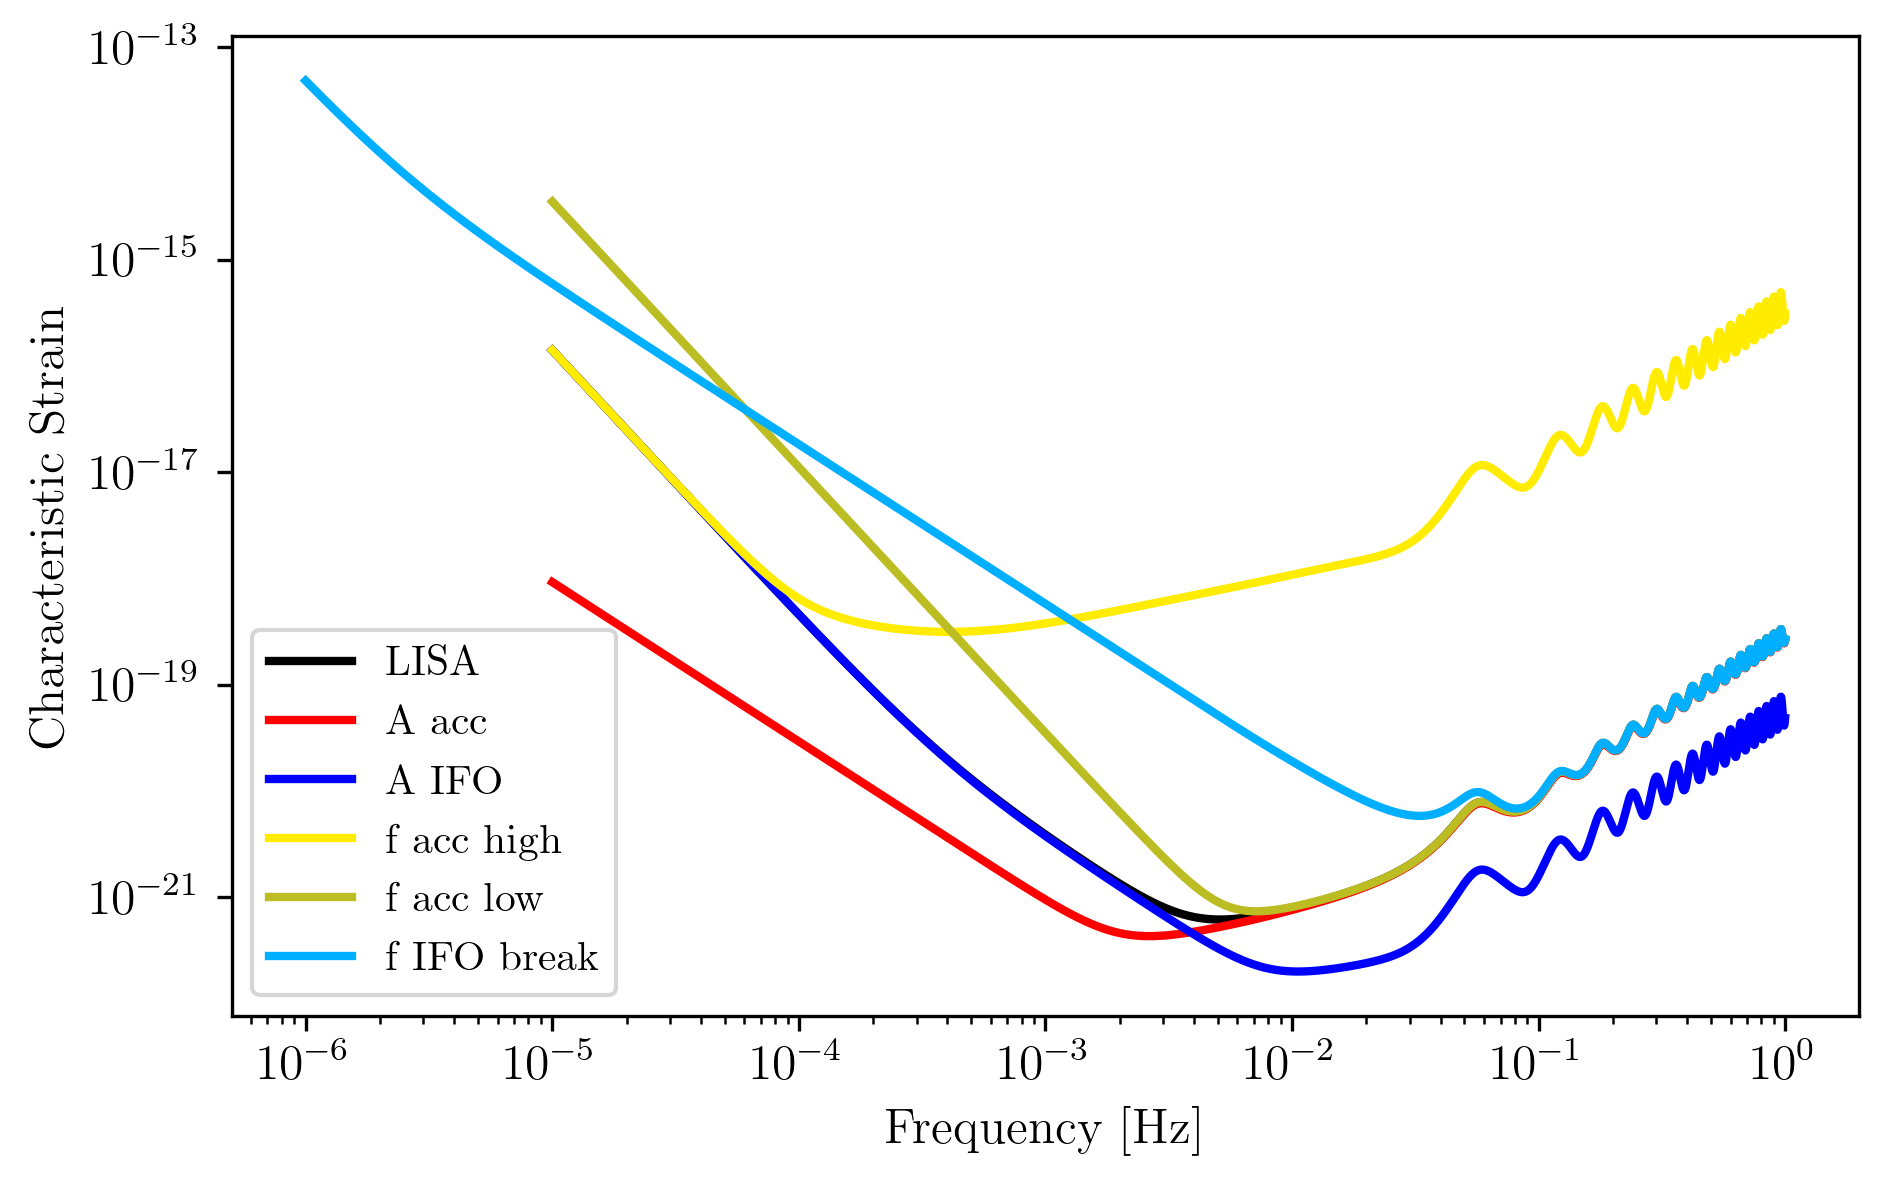

In [47]:
fig = plt.figure()
plt.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,label=LISA_prop1.name,color='k')
#plt.loglog(LISA_prop2.fT,LISA_prop2.h_n_f,label=LISA_prop2.name)
#plt.loglog(LISA_prop1_w_background.fT,LISA_prop1_w_background.h_n_f,label=LISA_prop1_w_background.name)
plt.loglog(LISA_prop3.fT,LISA_prop3.h_n_f,label='A acc',color='r')
plt.loglog(LISA_prop4.fT,LISA_prop4.h_n_f,label='A IFO',color='b')
plt.loglog(LISA_prop5.fT,LISA_prop5.h_n_f,label='f acc high',color=cm.hsv(colornorm(0.8)))
plt.loglog(LISA_prop6.fT,LISA_prop6.h_n_f,label='f acc low',color='C8')
plt.loglog(LISA_prop7.fT,LISA_prop7.h_n_f,label='f IFO break',color=cm.hsv(colornorm(2.8)))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
plt.show()

### All LISAs

In [48]:
#2018 ESA Science Requirements Document https://lisa.nasa.gov/documentsReference.html
fT_tmp = LISA_prop1.fT.value
f_1 = 0.4*u.mHz.to('Hz')
f_2 = 25*u.mHz.to('Hz')
S_I_f = 5.76e-48*(1+(f_1/fT_tmp)**2)
S_II_f = 3.6e-41
R_f = 1 + (fT_tmp/f_2)**2
S_h_f = 10/3*(S_I_f/(2*np.pi*fT_tmp)**4 + S_II_f)*R_f
h_h_f = np.sqrt(fT_tmp*S_h_f)

In [49]:
def LISA_Background(T_obs):
    """
    Galactic confusions noise parameters for 6months, 1yr, 2yr, and 4yr
    corresponding to array index 0,1,2,3 respectively
    """
    f = np.logspace(-5,-2,100)
    A = 9e-45
    a = np.array([0.133,0.171,0.165,0.138])
    b = np.array([243,292,299,-221])
    k = np.array([482,1020,611,521])
    g = np.array([917,1680,1340,1680])
    f_k = np.array([0.00258,0.00215,0.00173,0.00113])

    if T_obs < 1.*u.yr:
        index = 0
    elif T_obs >= 1.*u.yr and T_obs < 2.*u.yr:
        index = 1
    elif T_obs >= 2.*u.yr and T_obs < 4.*u.yr:
        index = 2
    else:
        index = 3
    S_c_f = A*np.exp(-(f**a[index])+(b[index]*f*np.sin(k[index]*f)))\
            *(f**(-7/3))*(1 + np.tanh(g[index]*(f_k[index]-f))) #White Dwarf Background Noise
    return [f,S_c_f]

In [50]:
#Backgrounds at 6months, 1yr, 2yr, and 4yr
t_l_1_f,t_l_1_S_c_f = LISA_Background(u.yr/2)
t_1_f,t_1_S_c_f = LISA_Background(u.yr)
t_2_f,t_2_S_c_f = LISA_Background(2*u.yr)
t_4_f,t_4_S_c_f = LISA_Background(4*u.yr)

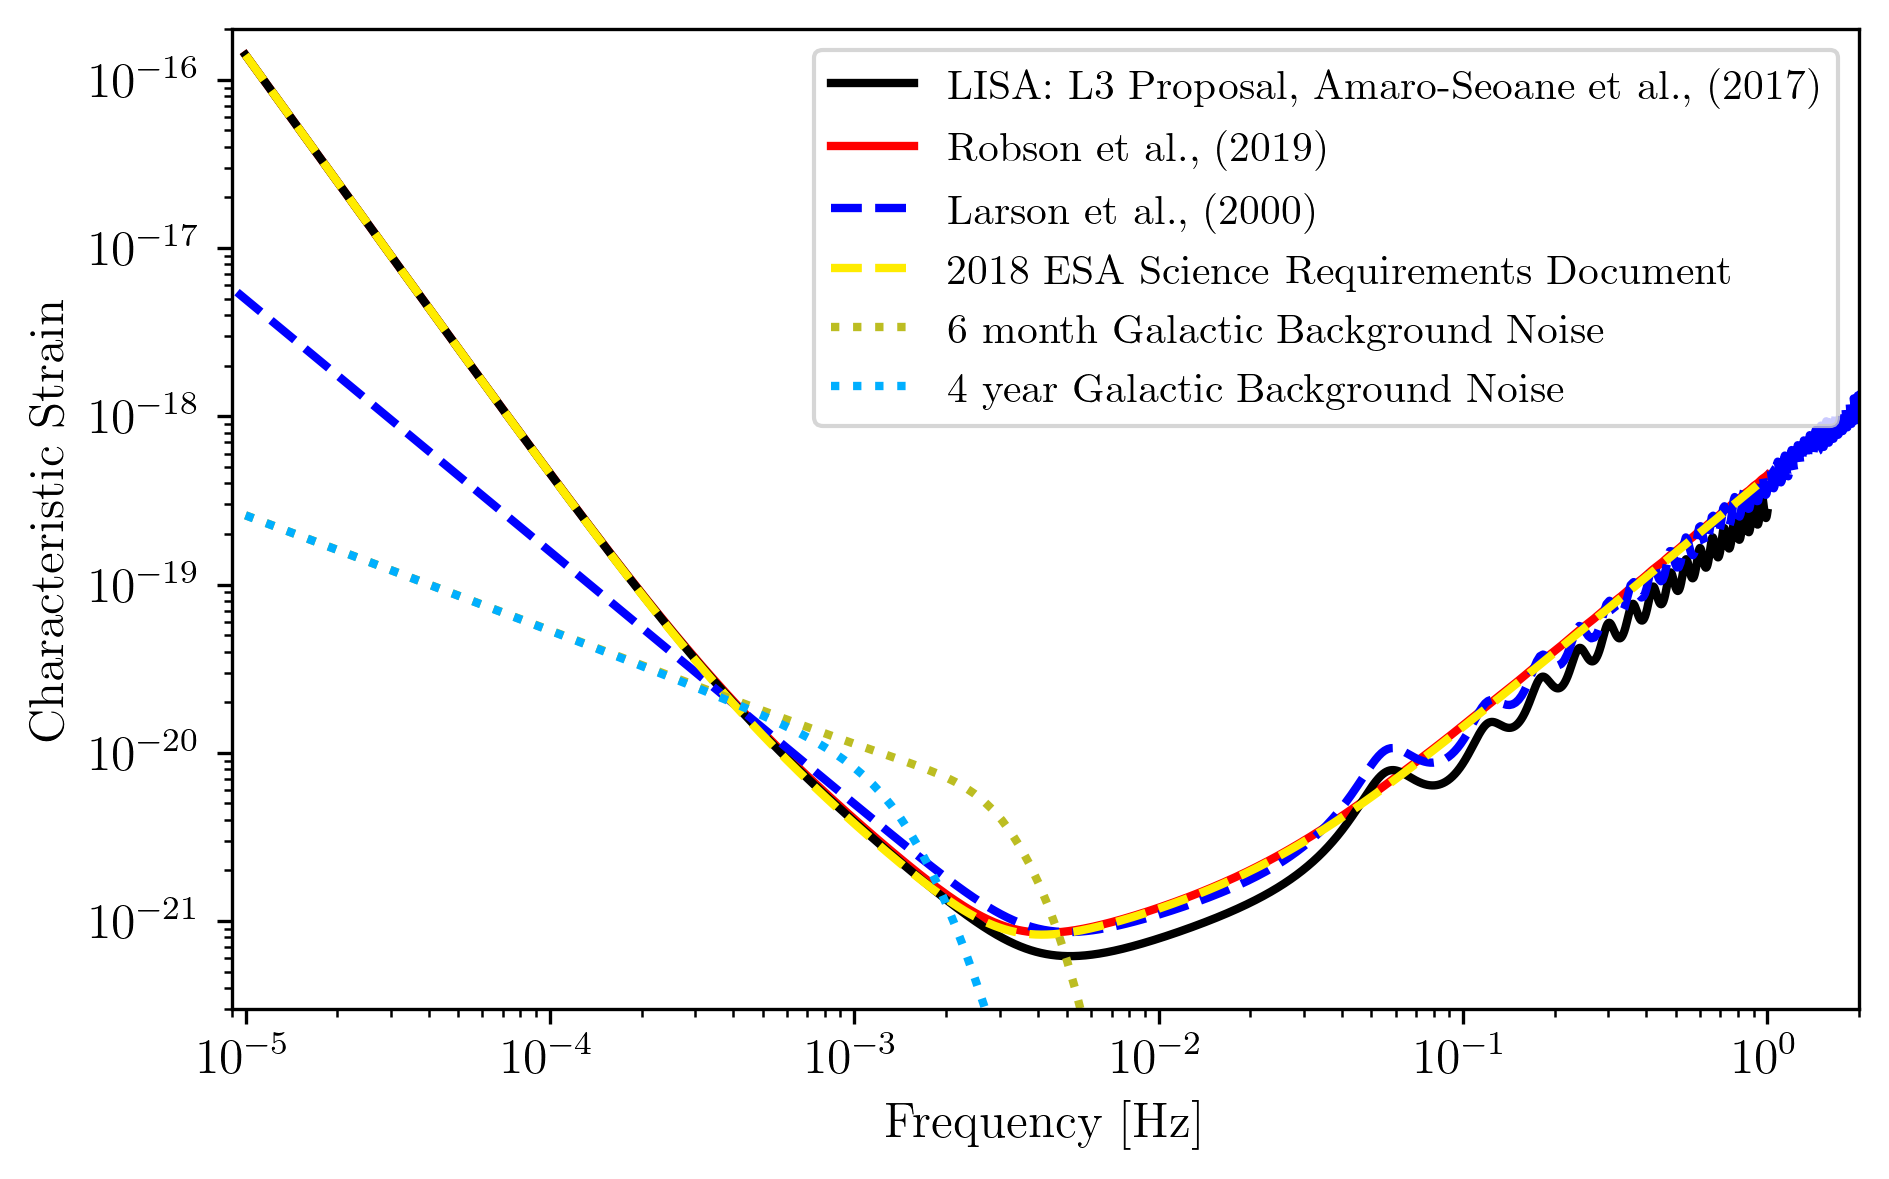

In [51]:
fig = plt.figure()
linesize = 1.5
#Amaro-Seoane et al., (2017) modelled w/\texttt{gwent}
plt.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,label=r'LISA: L3 Proposal, Amaro-Seoane et al., (2017)',color='k')
plt.loglog(LISA_prop2.fT,LISA_prop2.h_n_f,label=r'Robson et al., (2019)',
           color='r',zorder=-1)
plt.loglog(LISA_ex3.fT,LISA_ex3.h_n_f,label=r'Larson et al., (2000)',
           linestyle='--',color='b')
plt.loglog(fT_tmp,h_h_f,label=r'2018 ESA Science Requirements Document',
           linestyle='--',color=cm.hsv(colornorm(0.8)))

plt.loglog(t_l_1_f,np.sqrt(t_l_1_f*t_l_1_S_c_f),label=r'6 month Galactic Background Noise',
           linestyle=':',color='C8')
plt.loglog(t_4_f,np.sqrt(t_4_f*t_4_S_c_f),label=r'4 year Galactic Background Noise',
           linestyle=':',color=cm.hsv(colornorm(2.8)))

plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.ylim([3e-22,2e-16])
plt.xlim([9e-6,2])
plt.legend(loc='upper right')
fig.savefig(save_directory+'all_LISA_comp.pdf',bbox_inches='tight')
plt.show()

## Generating Ground Based Detector Designs with `gwent`

First we set a fiducial observation time-length

In [52]:
Ground_T_obs = 4*u.yr

### aLIGO

In [53]:
aLIGO_gwinc = detector.GroundBased('aLIGO gwinc',Ground_T_obs,f_low=min(aLIGO_1.fT),f_high=max(aLIGO_1.fT))

### A+

In [54]:
Aplus_gwinc = detector.GroundBased('Aplus gwinc',Ground_T_obs,f_low=min(aLIGO_1.fT),f_high=max(aLIGO_1.fT))

### Voyager

In [55]:
Voyager_gwinc = detector.GroundBased('Voyager gwinc',Ground_T_obs)

### Cosmic Explorer

In [56]:
CE1_gwinc = detector.GroundBased('CE1 gwinc',Ground_T_obs)

### Plots of Generated Ground Based Detectors

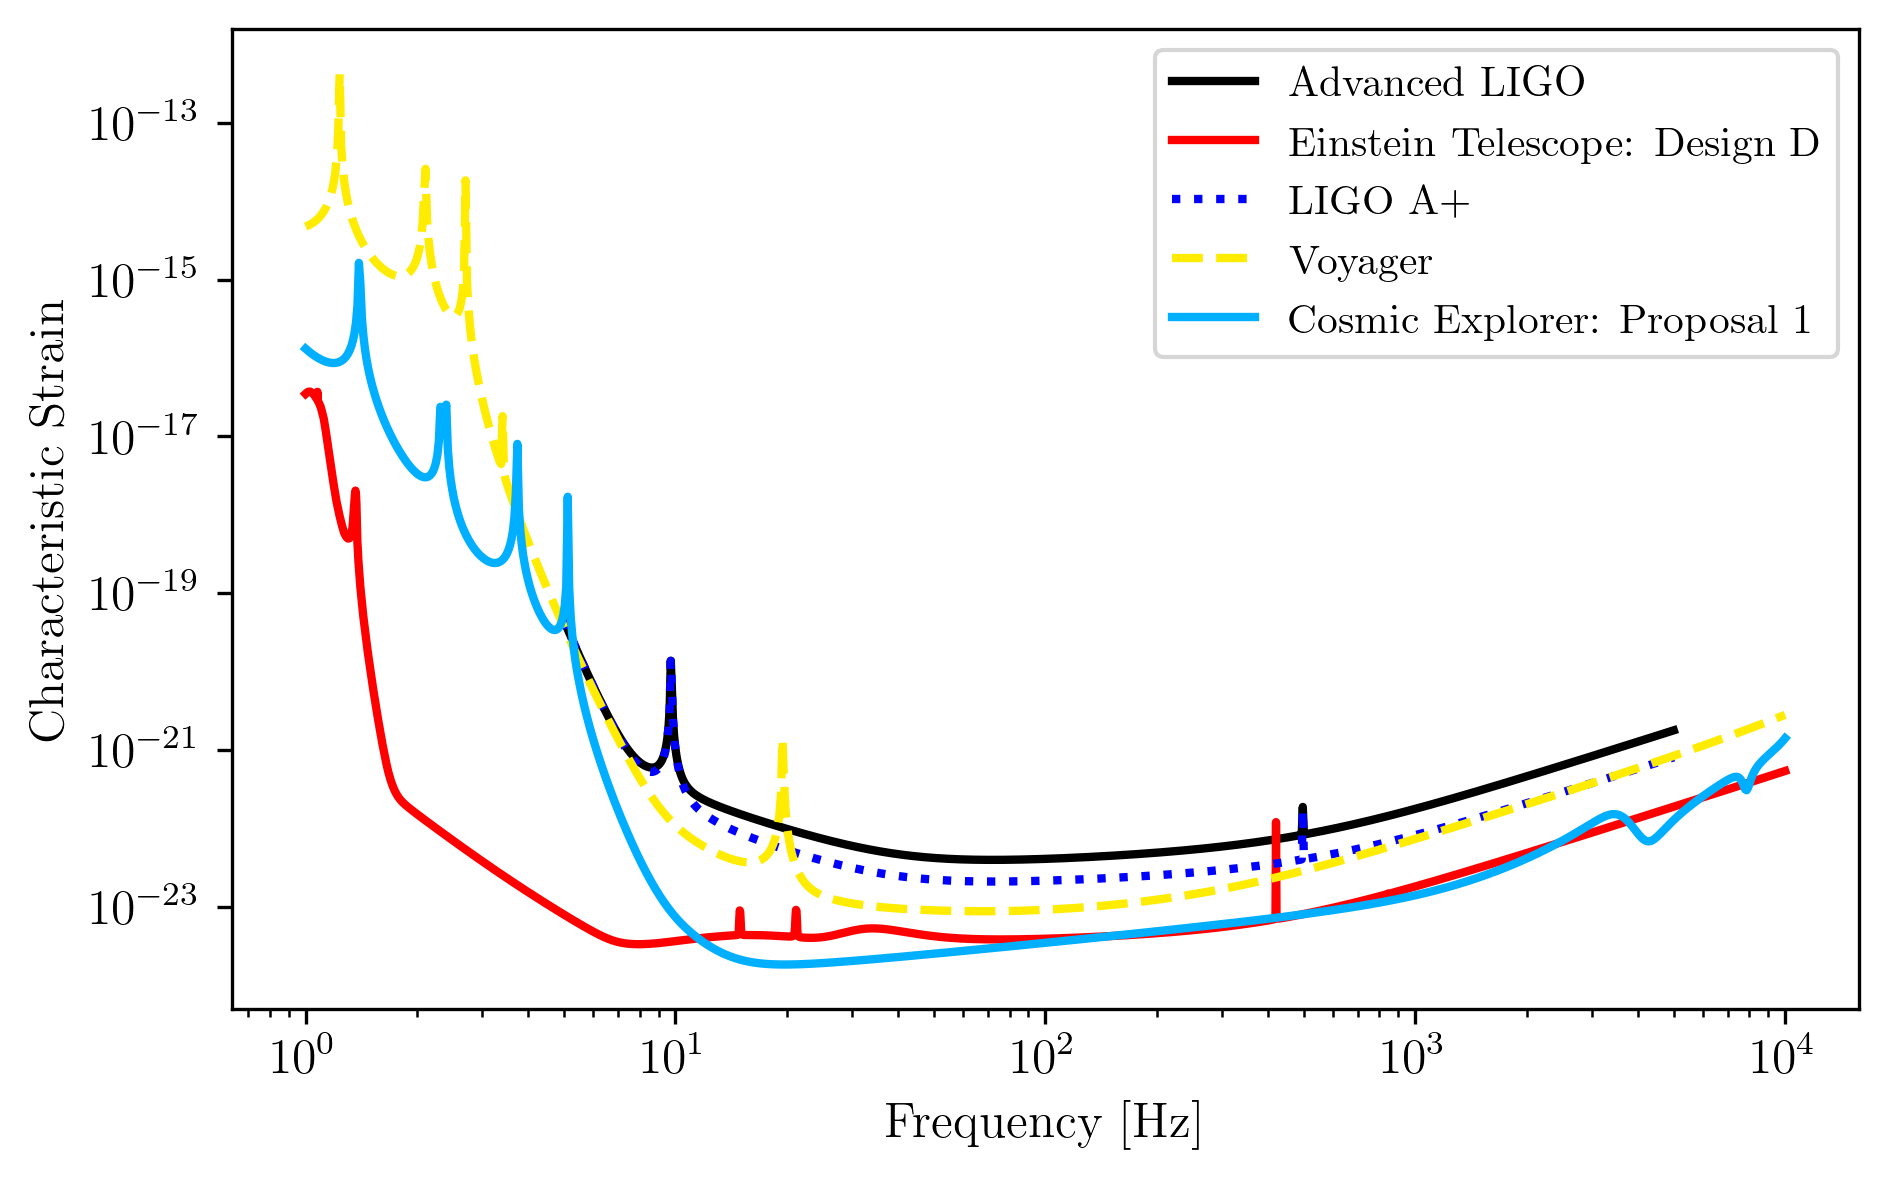

In [57]:
fig = plt.figure()
plt.loglog(aLIGO_gwinc.fT,aLIGO_gwinc.h_n_f,label='Advanced LIGO',color='k')
plt.loglog(ET_D.fT,ET_D.h_n_f,label='Einstein Telescope: Design D',color='r')
plt.loglog(Aplus_gwinc.fT,Aplus_gwinc.h_n_f,label='LIGO A+',
           linestyle=':',color='b')
plt.loglog(Voyager_gwinc.fT,Voyager_gwinc.h_n_f,label='Voyager',
           linestyle='--',color=cm.hsv(colornorm(0.8)))
plt.loglog(CE1_gwinc.fT,CE1_gwinc.h_n_f,label='Cosmic Explorer: Proposal 1',color=cm.hsv(colornorm(2.8)))
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
#fig.savefig(save_directory+'all_ground_comp.pdf',bbox_inches='tight')
plt.show()

## Generating Binary Black Holes with `gwent` in the Frequency Domain

We start with BBH parameters that exemplify the range of IMRPhenomD's waveforms from Khan, et al. 2016 https://arxiv.org/abs/1508.07253 and Husa, et al. 2016 https://arxiv.org/abs/1508.07250 

In [58]:
M = [1e6,65.0,1e10]
q = [1.0,18.0,1.0]
x1 = [0.95,0.0,-0.95]
x2 = [0.95,0.0,-0.95]
z = [3.0,0.093,20.0]

Uses the first parameter values and the `LISA_prop1` detector model for calculation of the monochromatic strain.

In [59]:
source_1 = binary.BBHFrequencyDomain(M[0],q[0],z[0],x1[0],x2[0],instrument=LISA_prop1)

Uses the first parameter values and the `aLIGO` detector model for calculation of the monochromatic strain.

In [60]:
source_2 = binary.BBHFrequencyDomain(M[1],q[1],z[1],x1[1],x2[1],instrument=aLIGO_1)

Uses the first parameter values and the `SKA_WN` detector model for calculation of the monochromatic strain.

In [61]:
source_3 = binary.BBHFrequencyDomain(M[2],q[2],z[2],x1[2],x2[2],instrument=SKA_WN)

Uses the first parameter values and the `ET` detector model for calculation of the monochromatic strain.

In [62]:
source_4 = binary.BBHFrequencyDomain(M[1],q[0],z[1],x1[1],x2[1],instrument=ET_D)

In [63]:
t_year = u.yr.to('s')*u.s
t_200_year = 200.*t_year

In [64]:
source_5_q1_1 = binary.BBHFrequencyDomain(1e10,1.0,0.1,0.0,0.0,instrument=NANOGrav_11yr_hasasia)
source_5_q1_2 = binary.BBHFrequencyDomain(1e10,1.0,0.1,-0.95,-0.95,instrument=NANOGrav_11yr_hasasia)
source_5_q1_3 = binary.BBHFrequencyDomain(1e10,1.0,0.1,0.95,0.95,instrument=NANOGrav_11yr_hasasia)

source_5_q18_1 = binary.BBHFrequencyDomain(1e10,18.0,0.1,0.0,0.0,instrument=NANOGrav_11yr_hasasia)
source_5_q18_2 = binary.BBHFrequencyDomain(1e10,18.0,0.1,-0.95,-0.95,instrument=NANOGrav_11yr_hasasia)
source_5_q18_3 = binary.BBHFrequencyDomain(1e10,18.0,1.0,0.95,0.95,instrument=NANOGrav_11yr_hasasia)

source_6_q1_1 = binary.BBHFrequencyDomain(1e5,1.0,1.0,0.0,0.0,instrument=LISA_prop1)
source_6_q1_2 = binary.BBHFrequencyDomain(1e5,1.0,1.0,-0.95,-0.95,instrument=LISA_prop1)
source_6_q1_3 = binary.BBHFrequencyDomain(1e5,1.0,1.0,0.95,0.95,instrument=LISA_prop1)

source_6_q18_1 = binary.BBHFrequencyDomain(1e5,18.0,1.0,0.0,0.0,instrument=LISA_prop1)
source_6_q18_2 = binary.BBHFrequencyDomain(1e5,18.0,1.0,-0.95,-0.95,instrument=LISA_prop1)
source_6_q18_3 = binary.BBHFrequencyDomain(1e5,18.0,1.0,0.95,0.95,instrument=LISA_prop1)

source_7_q1_1 = binary.BBHFrequencyDomain(1e2,1.0,3.0,0.0,0.0,instrument=ET_D)
source_7_q1_2 = binary.BBHFrequencyDomain(1e2,1.0,3.0,-0.95,-0.95,instrument=ET_D)
source_7_q1_3 = binary.BBHFrequencyDomain(1e2,1.0,3.0,0.95,0.95,instrument=ET_D)

source_7_q18_1 = binary.BBHFrequencyDomain(1e2,18.0,3.0,0.0,0.0,instrument=ET_D)
source_7_q18_2 = binary.BBHFrequencyDomain(1e2,18.0,3.0,-0.95,-0.95,instrument=ET_D)
source_7_q18_3 = binary.BBHFrequencyDomain(1e2,18.0,3.0,0.95,0.95,instrument=ET_D)

source_8 = binary.BBHFrequencyDomain(1e2,1.0,1.0,0.0,0.0,instrument=LISA_prop1)
source_9 = binary.BBHFrequencyDomain(1e8,1.0,0.1,0.0,0.0,instrument=NANOGrav_WN)

In [65]:
source_5_t_200_year_f = source_5_q1_1.Get_Source_Freq(t_200_year)/(1+source_5_q1_1.z)
idx2 = np.abs(source_5_q1_1.f-source_5_t_200_year_f).argmin()
source_5_t_200_year_h = binary.Get_Char_Strain(source_5_q1_1)[idx2]

source_5_t_year_f = source_5_q1_1.Get_Source_Freq(t_year)/(1+source_5_q1_1.z)
idx3 = np.abs(source_5_q1_1.f-source_5_t_year_f).argmin()
source_5_t_year_h = binary.Get_Char_Strain(source_5_q1_1)[idx3]

source_5_t_T_obs_f = source_5_q1_1.Get_Source_Freq(source_5_q1_1.instrument.T_obs.to('s'))/(1+source_5_q1_1.z)
idx4 = np.abs(source_5_q1_1.f-source_5_t_T_obs_f).argmin()
source_5_t_T_obs_h = binary.Get_Char_Strain(source_5_q1_1)[idx4]

source_6_t_200_year_f = source_6_q18_1.Get_Source_Freq(t_200_year)/(1+source_6_q18_1.z)
idx6 = np.abs(source_6_q18_1.f-source_6_t_200_year_f).argmin()
source_6_t_200_year_h = binary.Get_Char_Strain(source_6_q18_1)[idx6]

source_6_t_year_f = source_6_q18_1.Get_Source_Freq(t_year)/(1+source_6_q18_1.z)
idx7 = np.abs(source_6_q18_1.f-source_6_t_year_f).argmin()
source_6_t_year_h = binary.Get_Char_Strain(source_6_q18_1)[idx7]

source_6_t_T_obs_f = source_6_q18_1.Get_Source_Freq(source_6_q18_1.instrument.T_obs.to('s'))/(1+source_6_q18_1.z)
idx8 = np.abs(source_6_q18_1.f-source_6_t_T_obs_f).argmin()
source_6_t_T_obs_h = binary.Get_Char_Strain(source_6_q18_1)[idx8]

source_8_t_T_obs_f = source_8.Get_Source_Freq(aLIGO_1.T_obs.to('s'))/(1+source_8.z)
idx9 = np.abs(source_8.f-source_8_t_T_obs_f).argmin()

source_9_t_T_obs_f = source_9.Get_Source_Freq(LISA_prop1.T_obs.to('s'))/(1+source_9.z)
idx10 = np.abs(source_9.f-source_9_t_T_obs_f).argmin()

#### Plot different binaries

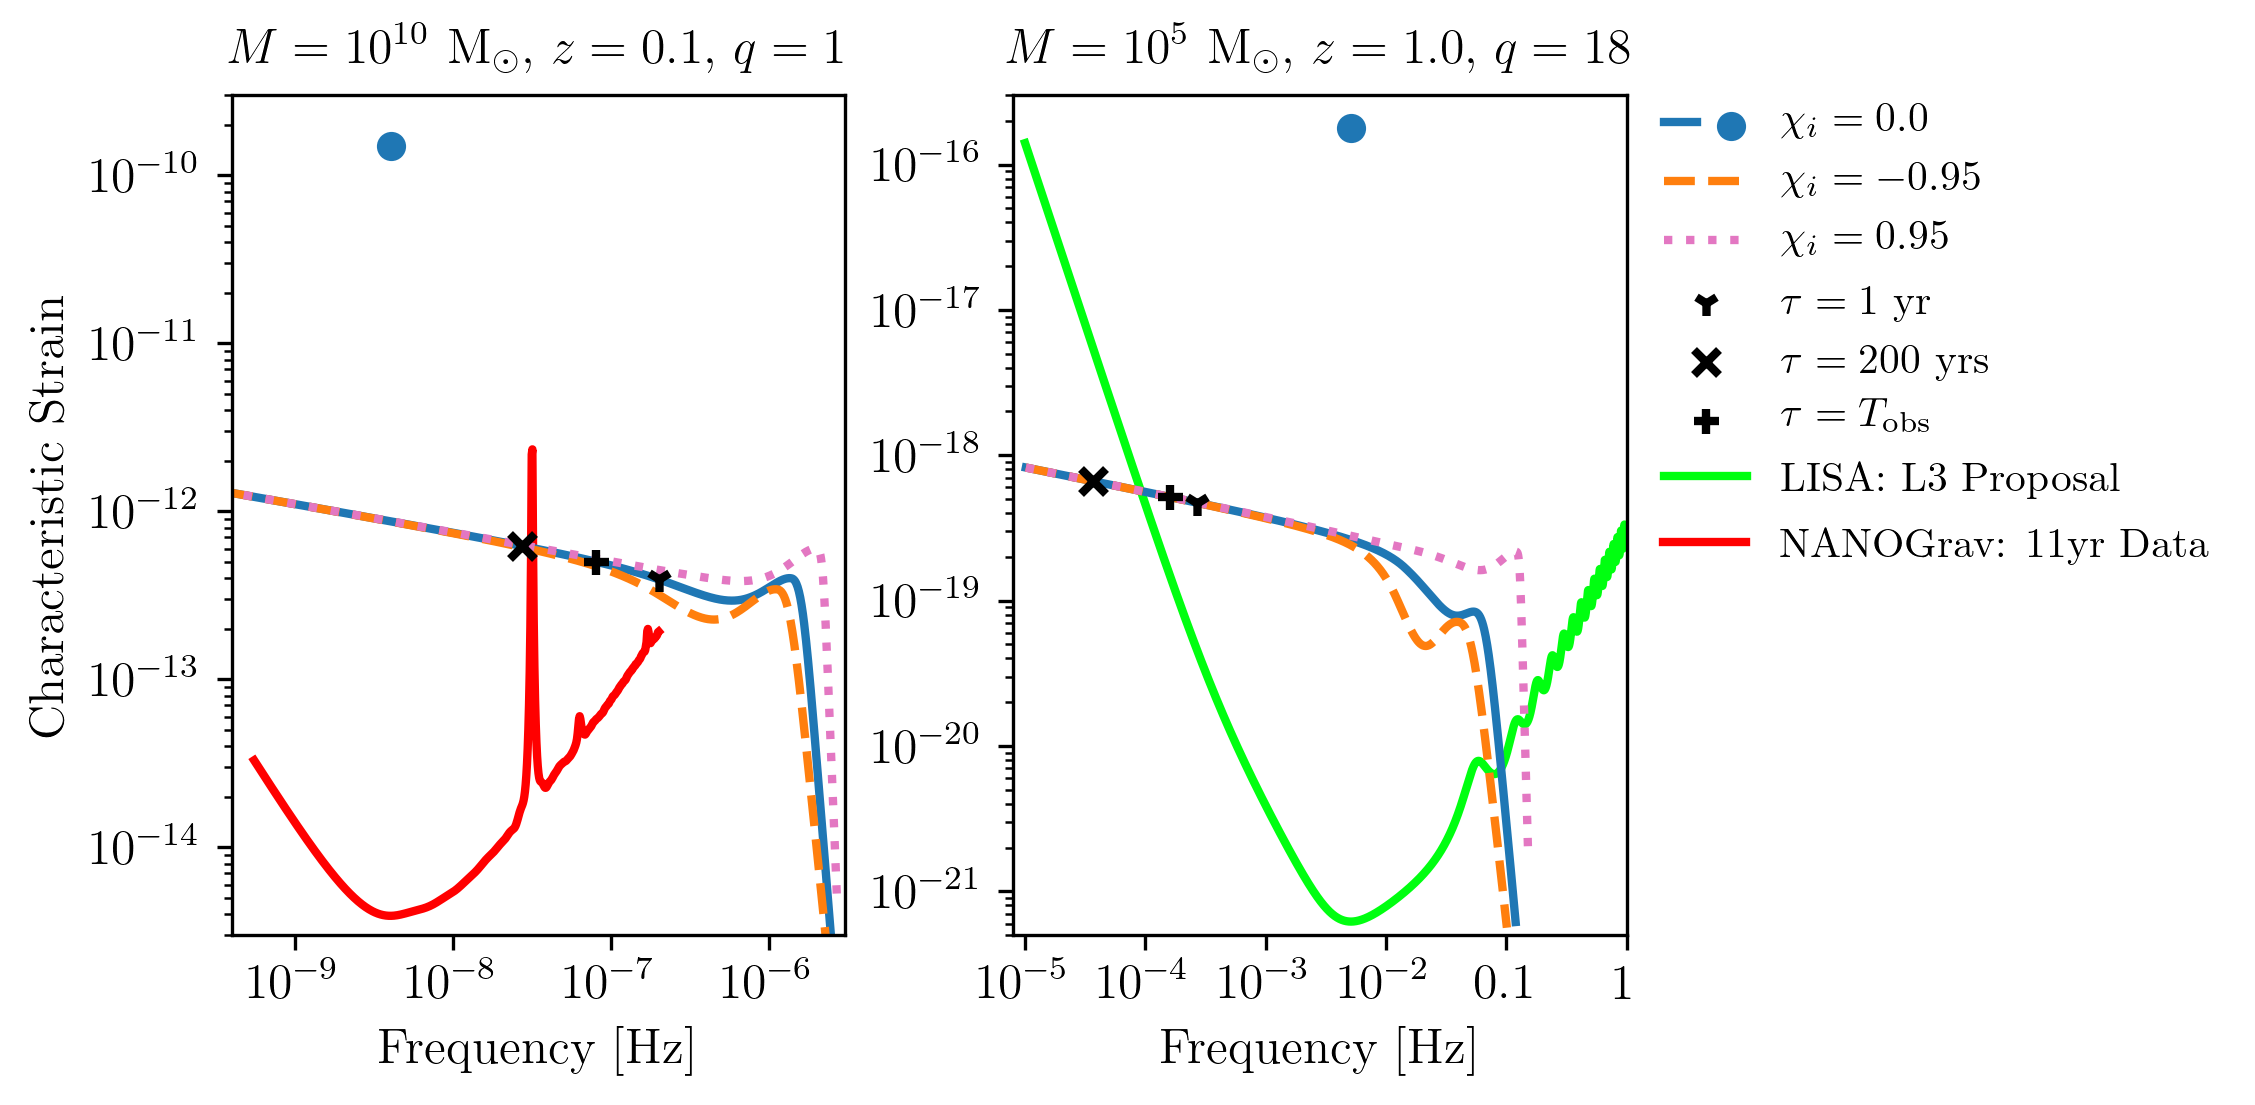

In [70]:
zord = 10.
figsize=get_fig_size(width=6.0)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=figsize)
"""
l1, = ax1.loglog(SKA_WN.fT,SKA_WN.h_n_f, linewidth = linesize,
           color = cm.hsv(colornorm(0.0)))
"""
ax1.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,
           color = cm.hsv(colornorm(0.0)),label=r'NANOGrav: 11yr Data')
l2, = ax2.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,color = cm.hsv(colornorm(1.75)))
"""
ax.loglog(aLIGO.fT,aLIGO.h_n_f,color = cm.hsv(colornorm(2.8)),label = 'aLIGO')
ax.loglog(ET.fT,ET.h_n_f,color = cm.hsv(colornorm(2.5)),label = 'Einstein Telescope')
"""
s5_q1_l_1, = ax1.loglog(source_5_q1_1.f,binary.Get_Char_Strain(source_5_q1_1),
                  color = 'C0')
s5_q1_p_1 = ax1.scatter(source_5_q1_1.instrument.f_opt,
                        binary.Get_Mono_Char_Strain(source_5_q1_1,source_5_q1_1.instrument),color = 'C0')
"""s5_q1_p_1 = ax1.scatter(source_5_q1_1.instrument.f_opt,
                        source_5_q1_1.h_gw,color = 'C0')"""
s5_q1_l_2, = ax1.loglog(source_5_q1_2.f,binary.Get_Char_Strain(source_5_q1_2),
                  linestyle='--',color = 'C1')
s5_q1_l_3, = ax1.loglog(source_5_q1_3.f,binary.Get_Char_Strain(source_5_q1_3),
                  linestyle=':',color = 'C6')

ax1.scatter(source_5_t_200_year_f.value,source_5_t_200_year_h,color='k',zorder=zord,marker='x')
ax1.scatter(source_5_t_year_f.value,source_5_t_year_h,color='k',zorder=zord,marker='1')
ax1.scatter(source_5_t_T_obs_f.value,source_5_t_T_obs_h,color='k',zorder=zord,marker='+')

s6_q18_l_1, = ax2.loglog(source_6_q18_1.f,binary.Get_Char_Strain(source_6_q18_1),
                  color = 'C0')
s6_q18_p_1 = ax2.scatter(source_6_q18_1.instrument.f_opt,
                         binary.Get_Mono_Char_Strain(source_6_q18_1,source_6_q18_1.instrument),color = 'C0')
"""s6_q18_p_1 = ax2.scatter(source_6_q18_1.instrument.f_opt,
                         source_6_q18_1.h_gw),color = 'C0')"""
s6_q18_l_2, = ax2.loglog(source_6_q18_2.f,binary.Get_Char_Strain(source_6_q18_2),
                  linestyle='--',color = 'C1')
s6_q18_l_3, = ax2.loglog(source_6_q18_3.f,binary.Get_Char_Strain(source_6_q18_3),
                  linestyle=':',color = 'C6')

p1 = ax2.scatter(source_6_t_200_year_f.value,source_6_t_200_year_h,color='k',zorder=zord,marker='x')
p2 = ax2.scatter(source_6_t_year_f.value,source_6_t_year_h,color='k',zorder=zord,marker='1')
p3 = ax2.scatter(source_6_t_T_obs_f.value,source_6_t_T_obs_h,color='k',zorder=zord,marker='+')

xlabel_min = -10
xlabel_max = 4
xlabels = np.arange(xlabel_min,xlabel_max+1)
#xlabels = xlabels[1::2]

ax1.set_xticks(10.**xlabels)
ax2.set_xticks(10.**xlabels)
print_xlabels = []
for x in xlabels:
    if abs(x) > 1:
        print_xlabels.append(r'$10^{%i}$' %x)
    elif x == -1:
        print_xlabels.append(r'$%.1f$' %10.**x)
    else:
        print_xlabels.append(r'$%.0f$' %10.**x)
ax1.set_xticklabels([label for label in print_xlabels])
ax2.set_xticklabels([label for label in print_xlabels])

ax1.set_xlim([4e-10, 3e-6])
ax1.set_ylim([3e-15, 3e-10])

ax2.set_xlim([8e-6, 1.])
ax2.set_ylim([5e-22, 3e-16])

ax1.set_xlabel('Frequency [Hz]')
ax2.set_xlabel('Frequency [Hz]')

ax1.set_ylabel('Characteristic Strain')

ax1.legend(fancybox=True,framealpha=0.0,bbox_to_anchor=(3.285, 0.53))
ax2.legend([(s6_q18_l_1,s6_q18_p_1),s6_q18_l_2,s6_q18_l_3,p2,p1,p3,l2],
           [r'$\chi_{i} = %.1f$'%source_6_q18_1.chi1,
            r'$\chi_{i} = %.2f$' %source_6_q18_2.chi1,
            r'$\chi_{i} = %.2f$' %source_6_q18_3.chi1,
            r'$\tau = %.0f$ yr' %t_year.to('yr').value,
            r'$\tau = %.0f$ yrs' %t_200_year.to('yr').value,
            r'$\tau = T_{\mathrm{obs}}$',
            'LISA: L3 Proposal'],
           numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)},
           fancybox=True,framealpha=0.0,bbox_to_anchor=(1.0, 1.03))
ax1.set_title(r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $z = %.1f$, $q = %.0f$' 
              %(np.log10(source_5_q1_1.M.value),source_5_q1_1.z,source_5_q1_1.q))
ax2.set_title(r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $z = %.1f$, $q = %.0f$' 
              %(np.log10(source_6_q18_1.M.value),source_6_q18_1.z,source_6_q18_1.q))
fig.subplots_adjust(wspace=.275)
#fig.tight_layout()
fig.savefig(save_directory+'source_parameter_comparison.pdf',bbox_inches='tight')
plt.show()

## Generate Frequency Data from Given Time Domain

Uses waveforms that are the difference between Effective One Body waveforms subtracted from Numerical Relativity waveforms for different harmonics.

In [ ]:
EOBdiff_filedirectory = load_directory + '/DiffStrain/EOBdiff/'
diff0002 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0002.dat')
diff0114 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0114.dat')
diff0178 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0178.dat')
diff0261 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0261.dat')
diff0303 = binary.BBHTimeDomain(M[1],q[0],z[1],load_location=EOBdiff_filedirectory+'diff0303.dat')

In [ ]:
fig,ax = plt.subplots()
plt.loglog(ET_D.fT,ET_D.h_n_f,color = cm.hsv(colornorm(1.75)),label = ET_D.name)
plt.loglog(diff0002.f,binary.Get_Char_Strain(diff0002),label = 'diff0002')
plt.loglog(diff0114.f,binary.Get_Char_Strain(diff0114),label = 'diff0114')
plt.loglog(diff0178.f,binary.Get_Char_Strain(diff0178),label = 'diff0178')
plt.loglog(diff0261.f,binary.Get_Char_Strain(diff0261),label = 'diff0261')
plt.loglog(diff0303.f,binary.Get_Char_Strain(diff0303),label = 'diff0303')
plt.xlabel(r'Frequency $[Hz]$')
plt.ylabel('Characteristic Strain')
plt.legend()
plt.show()

## Plots of Entire GW Band

Displays only generated detectors: WN only PTAs, ESA L3 proposal LISA, aLIGO, and Einstein Telescope.

Displays three sources' waveform along with their monochromatic strain if they were observed by the initialized instrument at the detector's most sensitive frequency throughout its observing run (from left to right: `SKA_WN`,`LISA_prop1`,`ET`).

In [ ]:
fig,ax = plt.subplots()

#ax.loglog(SKA_Sampled_Noise.fT,SKA_Sampled_Noise.h_n_f, linewidth = linesize,color = cm.hsv(colornorm(0.0)),label = r'IPTA $\sim$2030s')
ax.loglog(SKA_WN.fT,SKA_WN.h_n_f,color = cm.hsv(colornorm(0.0)),label = r'SKA: WN Only')
ax.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,color = cm.hsv(colornorm(0.5)),label = 'NANOGrav: 11yr Data')
ax.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,color = cm.hsv(colornorm(1.75)),label = 'LISA: L3 Proposal')
ax.loglog(aLIGO_1.fT,aLIGO_1.h_n_f,color = cm.hsv(colornorm(2.8)),label = 'Advanced LIGO')
ax.loglog(ET_D.fT,ET_D.h_n_f,color = cm.hsv(colornorm(2.5)),label = 'Einstein Telescope: Design D')
"""
ax.loglog(source_3.f,binary.Get_Char_Strain(source_3),color = cm.hsv(colornorm(4.5)),\
          label = r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(np.log10(M[2]),q[2],z[2],x1[2]))
ax.scatter(source_3.instrument.f_opt,source_3.h_gw,color = cm.hsv(colornorm(4.5)))

ax.loglog(source_1.f,binary.Get_Char_Strain(source_1),color = cm.hsv(colornorm(0.8)),\
          label = r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(np.log10(M[0]),q[0],z[0],x1[0]))
ax.scatter(source_1.instrument.f_opt,source_1.h_gw,color = cm.hsv(colornorm(0.8)))

ax.loglog(source_2.f,binary.Get_Char_Strain(source_2),color = cm.hsv(colornorm(3.0)),\
          label = r'$M = %.0f$ $\mathrm{M}_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.1f$' %(M[1],q[1],z[1],x1[1]))
ax.scatter(source_2.instrument.f_opt,source_2.h_gw,color = cm.hsv(colornorm(3.0)))
"""

xlabel_min = -10
xlabel_max = 4
xlabels = np.arange(xlabel_min,xlabel_max+1)
#xlabels = xlabels[1::2]

ax.set_xticks(10.**xlabels)
print_xlabels = []
for x in xlabels:
    if abs(x) > 1:
        print_xlabels.append(r'$10^{%i}$' %x)
    elif x == -1:
        print_xlabels.append(r'$%.1f$' %10.**x)
    else:
        print_xlabels.append(r'$%.0f$' %10.**x)
ax.set_xticklabels([label for label in print_xlabels],rotation=30)

ax.set_xlim([3e-10, 1e4])
ax.set_ylim([1e-24, 1e-11])

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Characteristic Strain')
ax.legend(loc='upper right')
fig.savefig(save_directory+'full_detector_GW_spectrum.pdf',bbox_inches='tight')
plt.show()

In [ ]:
fig,ax = plt.subplots()

#p_i_n, = ax.loglog(SKA_WN.fT,SKA_WN.h_n_f,color = cm.hsv(colornorm(0.5)),label = 'IPTA ~2030s')
p_i_n, = ax.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f, color = cm.hsv(colornorm(0.5)))
p_i_l, = ax.loglog(LISA_prop1.fT,LISA_prop1.h_n_f, color = cm.hsv(colornorm(1.75)))
p_i_a, = ax.loglog(aLIGO_1.fT,aLIGO_1.h_n_f,color = cm.hsv(colornorm(2.8)))
#ax.loglog(ET.fT,ET.h_n_f,color = cm.hsv(colornorm(2.5)),label = 'Einstein Telescope')

p_s_8_l, = ax.loglog(source_8.f[idx9:],binary.Get_Char_Strain(source_8)[idx9:],color = cm.hsv(colornorm(3.0)))
p_s_8_p = ax.scatter(source_8.instrument.f_opt,binary.Get_Mono_Char_Strain(source_8,source_8.instrument),color = cm.hsv(colornorm(3.0)))
p_s_9_l, = ax.loglog(source_9.f[idx10:],binary.Get_Char_Strain(source_9)[idx10:],color = cm.hsv(colornorm(5.0)))
p_s_9_p = ax.scatter(source_9.instrument.f_opt,binary.Get_Mono_Char_Strain(source_9,source_9.instrument),color = cm.hsv(colornorm(5.0)))

xlabel_min = -10
xlabel_max = 4
xlabels = np.arange(xlabel_min,xlabel_max+1)
xlabels = xlabels[1::]

ax.set_xticks(10.**xlabels)
print_xlabels = []
for x in xlabels:
    if abs(x) > 1:
        print_xlabels.append(r'$10^{%i}$' %x)
    elif x == -1:
        print_xlabels.append(r'$%.1f$' %10.**x)
    else:
        print_xlabels.append(r'$%.0f$' %10.**x)
ax.set_xticklabels([label for label in print_xlabels])

ax.set_xlim([5e-10, 7e3])
ax.set_ylim([3e-23, 4e-12])

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Characteristic Strain')
ax.legend([p_i_n,p_i_l,p_i_a,(p_s_8_l, p_s_8_p),(p_s_9_l, p_s_9_p)],
              ['NANOGrav: 11yr Data','LISA','aLIGO',
               r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $z = %.1f$' %(np.log10(source_8.M.value),source_8.z),
               r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $z = %.1f$' %(np.log10(source_9.M.value),source_9.z)],
              numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)},loc='upper right')
fig.savefig(save_directory+'detector_source_overlap.pdf',bbox_inches='tight')
plt.show()